# Import Libaries According to Need

In [22]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
# Set Pandas options to display all columns
pd.set_option('display.max_columns', None)

# Load the Data

In [2]:
data = pd.read_csv("C:\MSC Contech Courses\CS-1009\data.csv",encoding_errors='ignore')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Summary Statistics

In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Datatype and Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Handling Missing Values

In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Define a threshold (e.g., 30%)
threshold = 30

# Create a list of columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()

# Drop columns with missing values above the threshold
data = data.drop(columns=columns_to_drop)

# Print columns that were dropped
print("Dropped Columns:", columns_to_drop)

# Display the modified data
display(data.head())

Dropped Columns: []


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df = data.copy()
df['InvoiceDate_'] = df['InvoiceDate'].copy()

##  Predicting missing values for the Customer Column

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Filter out rows with missing CustomerIDs
data = data.dropna(subset=['CustomerID'])

# Select relevant features for prediction (excluding non-numeric columns)
features = ['Quantity', 'UnitPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['CustomerID'], test_size=0.2, random_state=42)

# Create a Random Forest Regressor model to predict CustomerID
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict CustomerIDs for the testing data
predicted_customer_ids = model.predict(X_test)

# Check for any remaining missing values
missing_values = data.isnull().sum()
print(missing_values)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [9]:
# Predict CustomerIDs for the testing data
predicted_customer_ids = model.predict(X_test)

# Create a DataFrame to display actual and predicted CustomerIDs
results = pd.DataFrame({'Actual CustomerID': y_test, 'Predicted CustomerID': predicted_customer_ids})

# Display the results
print(results.head())

        Actual CustomerID  Predicted CustomerID
47912             13534.0          15111.376397
342630            14894.0          15094.369373
288183            12921.0          15544.792136
325368            17229.0          15655.426746
331450            15144.0          14883.924820


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_customer_ids)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_customer_ids)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, predicted_customer_ids)

# Display the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2) Score: {r2}')

Mean Absolute Error (MAE): 1408.3026635863425
Mean Squared Error (MSE): 2743084.510975243
R-squared (R^2) Score: 0.062158276532278345


Not a reasonable  predition since mean squared error is in millions instead let drop the missing rows since we can't assume users ID

In [11]:
df.dropna(inplace=True)

# Sales Analysis

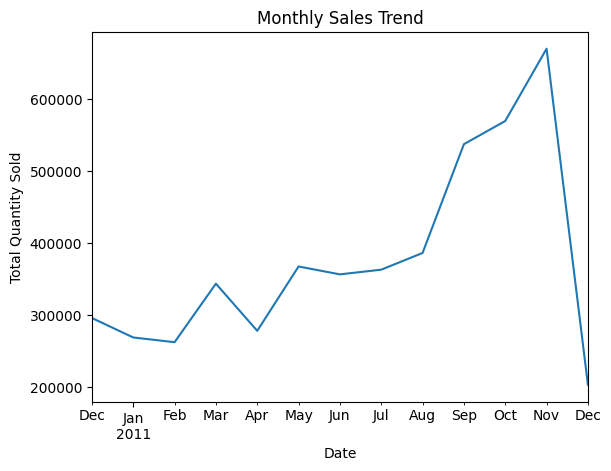

Total Revenue: 8300065.814000001


In [13]:
import matplotlib.pyplot as plt
# Sales trends over time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
monthly_sales = df.resample('M', on='InvoiceDate')['Quantity'].sum()
# Plot monthly sales
monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

# Calculate total revenue
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
total_revenue = df['TotalRevenue'].sum()
print(f'Total Revenue: {total_revenue}')


# Customer Analysis (RFM Analysis):

In [14]:
# Convert 'InvoiceDate' to a datetime data type if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate RFM metrics
current_date = df['InvoiceDate'].max()  # Assuming it's the current date

# Calculate Recency, Frequency, and Monetary Value for each customer
recency_df = df.groupby('CustomerID')['InvoiceDate'].max()
recency_df = (current_date - recency_df).dt.days

frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique()
monetary_df = df.groupby('CustomerID')['TotalRevenue'].sum()

# Create DataFrames for each metric and reset the index
recency_df = recency_df.reset_index()
frequency_df = frequency_df.reset_index()
monetary_df = monetary_df.reset_index()

# Rename columns to match the original DataFrame
recency_df.columns = ['CustomerID', 'Recency']
frequency_df.columns = ['CustomerID', 'Frequency']
monetary_df.columns = ['CustomerID', 'Monetary']

# Merge the metrics DataFrames with the original DataFrame on 'CustomerID'
df = pd.merge(df, recency_df, on='CustomerID', how='left')
df = pd.merge(df, frequency_df, on='CustomerID', how='left')
df = pd.merge(df, monetary_df, on='CustomerID', how='left')

# Segment customers
df['RFM_Score'] = df['Recency'] + df['Frequency'] + df['Monetary']
df['CustomerSegment'] = pd.qcut(df['RFM_Score'], q=4, labels=['Inactive', 'Low-Value', 'Mid-Value', 'High-Value'])

# Analyze customer segments
customer_segment_counts = df['CustomerSegment'].value_counts()
print(customer_segment_counts)

CustomerSegment
Inactive      101835
High-Value    101704
Mid-Value     101692
Low-Value     101598
Name: count, dtype: int64


# Custumer Segment

In [15]:
# Calculate percentiles for RFM values
rfm_percentiles = df.groupby('CustomerID')[['Recency', 'Frequency', 'Monetary']].agg(
    {'Recency': 'min', 'Frequency': 'mean', 'Monetary': 'sum'})
rfm_percentiles.rename(columns={'Recency': 'RecencyPercentile',
                                'Frequency': 'FrequencyPercentile',
                                'Monetary': 'MonetaryPercentile'}, inplace=True)

# Segment customers into quantiles
quantiles = rfm_percentiles.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()

def r_score(x):
    if x <= quantiles['RecencyPercentile'][0.25]:
        return 4
    elif x <= quantiles['RecencyPercentile'][0.50]:
        return 3
    elif x <= quantiles['RecencyPercentile'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c + 'Percentile'][0.25]:
        return 1
    elif x <= quantiles[c + 'Percentile'][0.50]:
        return 2
    elif x <= quantiles[c + 'Percentile'][0.75]:
        return 3
    else:
        return 4

df['R'] = df['Recency'].apply(r_score)
df['F'] = df['Frequency'].apply(fm_score, args=('Frequency',))
df['M'] = df['Monetary'].apply(fm_score, args=('Monetary',))

# Calculate RFM Score
df['RFM_Score'] = df['R'] * 100 + df['F'] * 10 + df['M']

# Define customer segments based on RFM Score
segment_dict = {
    111: 'Champions',
    411: 'Loyal Customers',
    144: 'Potential Loyalists',
    1441: 'New Customers',
    244: 'Promising',
    122: 'Need Attention',
    322: 'About to Sleep',
    333: 'At Risk',
    433: 'Can\'t Lose Them',
    444: 'Hibernating'
}
df['CustomerSegment'] = df['RFM_Score'].map(segment_dict)

# Analyze customer segments
segment_counts = df['CustomerSegment'].value_counts()
print(segment_counts)

CustomerSegment
Champions          11540
Hibernating         2869
Loyal Customers     2584
Need Attention        70
About to Sleep         4
Name: count, dtype: int64


# Customer Segments Analysis

In [16]:
# Analyze customer segments
segment_counts = df['CustomerSegment'].value_counts()

# Calculate average RFM scores by segment
avg_rfm_scores = df.groupby('CustomerSegment')[['R', 'F', 'M']].mean()

# Calculate total revenue by segment
segment_revenue = df.groupby('CustomerSegment')['TotalRevenue'].sum()

# Calculate the percentage of total revenue contributed by each segment
total_revenue = df['TotalRevenue'].sum()
percentage_revenue = (segment_revenue / total_revenue) * 100

# Create a summary DataFrame for customer segments
segment_summary = pd.DataFrame({
    'Customer Count': segment_counts,
    'Average Recency': avg_rfm_scores['R'],
    'Average Frequency': avg_rfm_scores['F'],
    'Average Monetary': avg_rfm_scores['M'],
    'Total Revenue': segment_revenue,
    'Percentage of Total Revenue': percentage_revenue
})

# Sort the segments by total revenue
segment_summary = segment_summary.sort_values(by='Total Revenue', ascending=False)

# Display the summary
print("Customer Segment Summary:")
display(segment_summary)


Customer Segment Summary:


,Customer Count,Average Recency,Average Frequency,Average Monetary,Total Revenue,Percentage of Total Revenue
CustomerSegment,,,,,,
Hibernating,2869,4.0,4.0,4.0,723409.68,8.715710
Champions,11540,1.0,1.0,1.0,171296.05,2.063791
Loyal Customers,2584,4.0,1.0,1.0,28159.29,0.339266
Need Attention,70,1.0,2.0,2.0,9861.38,0.118811
About to Sleep,4,3.0,2.0,2.0,6748.80,0.081310


# Product Analysis:

In [17]:
# Best-selling products
best_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(best_selling_products.head(10))

# Product profit margins without 'CostPrice' column
df['Profit'] = (df['Quantity'] * df['UnitPrice'])
product_profit_margin = df.groupby('Description')['Profit'].mean()
print(product_profit_margin.head(10))

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64
Description
 4 PURPLE FLOCK DINNER CANDLES       6.942564
 50'S CHRISTMAS GIFT BAG LARGE      20.634091
 DOLLY GIRL BEAKER                  19.648214
 I LOVE LONDON MINI BACKPACK        20.771429
 I LOVE LONDON MINI RUCKSACK         4.150000
 NINE DRAWER OFFICE TIDY            25.575806
 OVAL WALL MIRROR DIAMANTE          15.784375
 RED SPOT GIFT BAG LARGE            21.712766
 SET 2 TEA TOWELS I LOVE LONDON     35.041707
 SPACEBOY BABY GIFT SET             47.697260
Name: Profit, dtype: float64


# Product Analysis - Identify Seasonal Patterns:

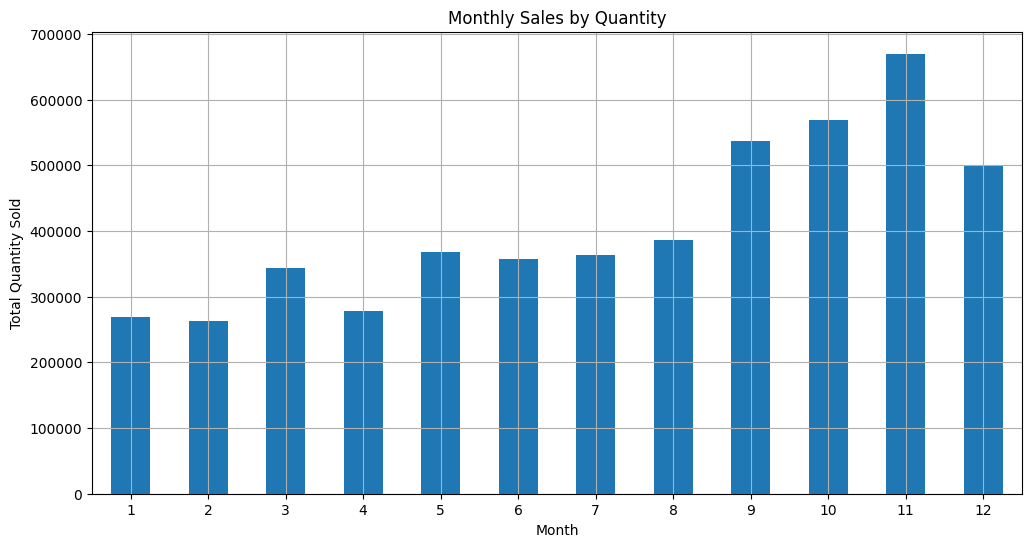

In [18]:
# Extract month from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month

# Analyze sales by month
monthly_sales = df.groupby('Month')['Quantity'].sum()

# Plot monthly sales to identify seasonal patterns
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', title='Monthly Sales by Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


## Geospatial Analysis - Sales by Country:

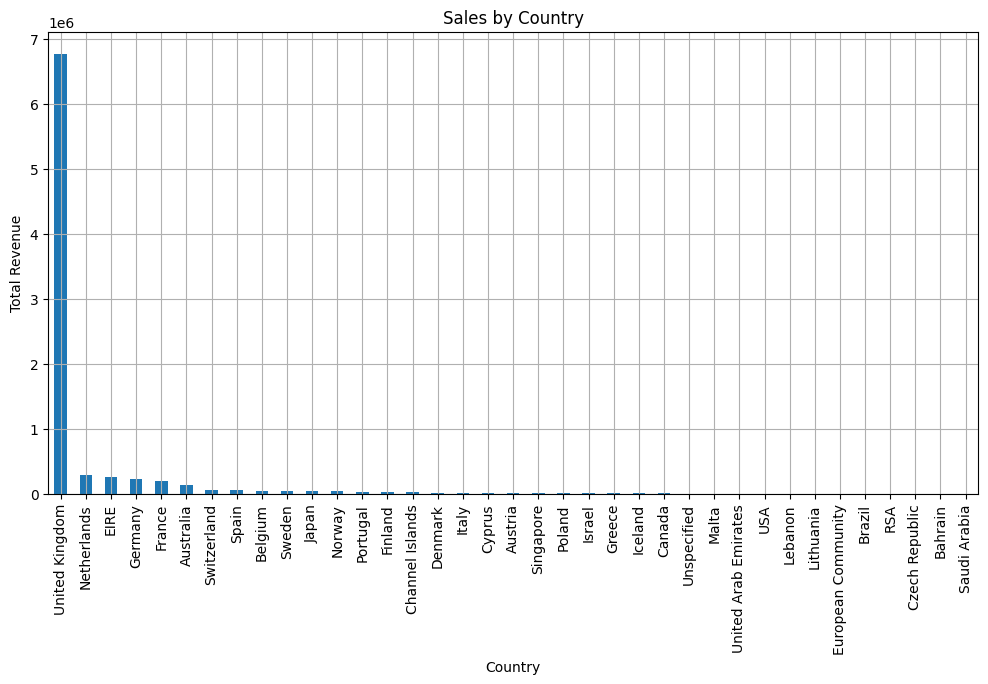

In [19]:
# Analyze sales by country
country_sales = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

# Plot sales by country on a bar chart
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', title='Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Customer Lifetime Value (CLV) Analysis:

In [20]:
# Calculate CLV for each customer

# Calculate the total monetary value for each customer
clv_data = df.groupby('CustomerID')['Monetary'].sum().reset_index()

# Define the time period for CLV analysis (e.g., 12 months)
clv_time_period = 12  # Adjust as needed

# Calculate the average revenue per month per customer
clv_data['AverageRevenue'] = clv_data['Monetary'] / clv_time_period

# Calculate the number of unique months each customer has made a purchase
clv_data['UniqueMonths'] = df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()['InvoiceDate']

# Calculate CLV as Average Revenue * Number of Unique Months
clv_data['CLV'] = clv_data['AverageRevenue'] * clv_data['UniqueMonths']

# Sort the CLV data to identify high-value customers
clv_data = clv_data.sort_values(by='CLV', ascending=False)

# Display the CLV data
print(clv_data[['CustomerID', 'CLV']].head())

      CustomerID           CLV
1895     14911.0  1.617324e+10
4042     17841.0  4.508566e+09
1703     14646.0  3.739214e+09
330      12748.0  2.530363e+09
2192     15311.0  1.455467e+09


## Product Sales Forecasting:

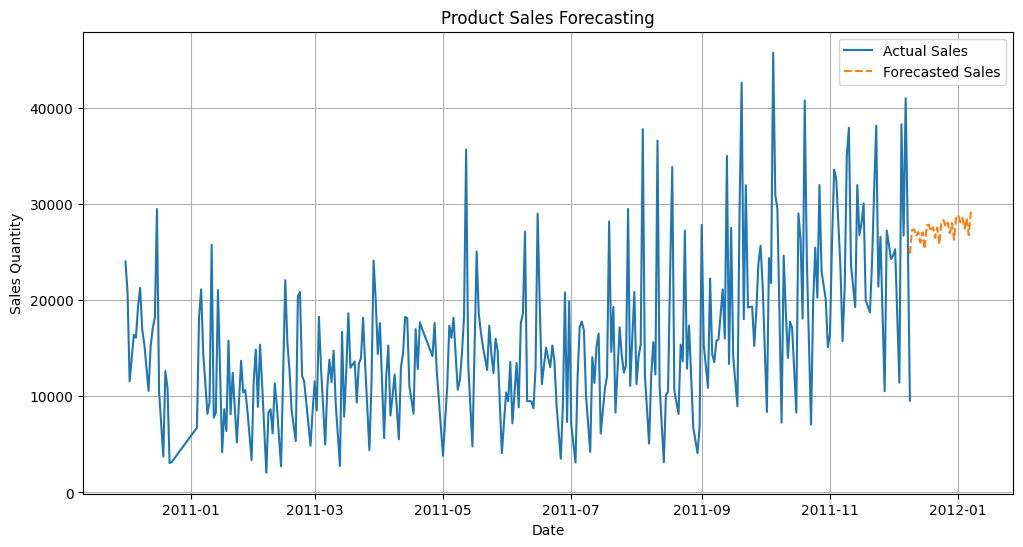

Forecasted Sales:
          Date  Forecasted Sales
305 2011-12-09      24836.095135
306 2011-12-10      27286.788416
307 2011-12-11      27369.737494
308 2011-12-12      26658.833732
309 2011-12-13      27107.501589
310 2011-12-14      25998.780696
311 2011-12-15      27057.761682
312 2011-12-16      25317.482754
313 2011-12-17      27768.176035
314 2011-12-18      27851.125113
315 2011-12-19      27140.221351
316 2011-12-20      27588.889209
317 2011-12-21      26480.168315
318 2011-12-22      27539.149301
319 2011-12-23      25798.870373
320 2011-12-24      28249.563654
321 2011-12-25      28332.512733
322 2011-12-26      27621.608970
323 2011-12-27      28070.276828
324 2011-12-28      26961.555934
325 2011-12-29      28020.536920
326 2011-12-30      26280.257992
327 2011-12-31      28730.951273
328 2012-01-01      28813.900352
329 2012-01-02      28102.996589
330 2012-01-03      28551.664447
331 2012-01-04      27442.943553
332 2012-01-05      28501.924539
333 2012-01-06      26761

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming you have a DataFrame df with product sales data
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group data by date and calculate daily product sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Quantity'].sum()

# Plot the historical daily sales data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Actual Sales')
plt.title('Product Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.grid()

# Forecast future sales using Exponential Smoothing
forecast_periods = 30  # Adjust the number of forecast periods as needed
model = ExponentialSmoothing(daily_sales, trend='add', seasonal='add', seasonal_periods=7)
forecast = model.fit().forecast(steps=forecast_periods)

# Create a date range for the forecasted periods
forecast_index = pd.date_range(start=daily_sales.index[-1], periods=forecast_periods, freq='D')

# Plot the forecasted sales
plt.plot(forecast_index, forecast, label='Forecasted Sales', linestyle='--')
plt.legend()
plt.show()

# Display the forecasted sales values
print("Forecasted Sales:")
print(pd.DataFrame({'Date': forecast_index, 'Forecasted Sales': forecast}))


## Market Basket Analysis:

In [24]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming you have a DataFrame df with relevant transaction data
# Each row represents a transaction with items in the 'Description' column

# Preprocess the data (e.g., remove duplicates and missing values)
df = df.drop_duplicates()
df = df.dropna(subset=['Description'])

# Perform one-hot encoding to prepare the data for market basket analysis
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket.set_index('InvoiceNo', inplace=True)

# Convert quantity values to binary (0 or 1)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Perform Apriori algorithm to find frequent itemsets
# lower thresholds
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

# Display interesting rules
interesting_rules = rules[(rules['lift'] >= 1.0) & (rules['confidence'] >= 0.2)]
print("Interesting Association Rules:")
print(interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Filter and display interesting rules
interesting_rules = rules[(rules['lift'] >= 1.0) & (rules['confidence'] >= 0.5)]

C:\Users\ndubu\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Interesting Association Rules:
                                           antecedents  \
0                        (60 TEATIME FAIRY CAKE CASES)   
1                     (72 SWEETHEART FAIRY CAKE CASES)   
2                        (60 TEATIME FAIRY CAKE CASES)   
3                     (PACK OF 60 DINOSAUR CAKE CASES)   
4                        (60 TEATIME FAIRY CAKE CASES)   
..                                                 ...   
550  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
551  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   
552                 (ROSES REGENCY TEACUP AND SAUCER )   
553                   (PINK REGENCY TEACUP AND SAUCER)   
555                  (GREEN REGENCY TEACUP AND SAUCER)   

                                           consequents   support  confidence  \
0                     (72 SWEETHEART FAIRY CAKE CASES)  0.010005    0.337900   
1                        (60 TEATIME FAIRY CAKE CASES)  0.010005    0.443114   
2                     (PACK OF 6

In [25]:
print("Interesting Association Rules:")
display(interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Interesting Association Rules:


,antecedents,consequents,support,confidence,lift
7,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.014872,0.502283,10.831547
11,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.010185,0.701863,17.758663
12,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.012393,0.587607,16.525977
14,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.015457,0.559543,15.736710
16,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.023885,0.604333,16.996386
...,...,...,...,...,...
546,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...","(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...",0.010771,0.548165,32.523488
547,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...","(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.010771,0.569048,27.450362
549,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...","(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.010771,0.773463,31.724841
550,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",0.010771,0.519565,27.450362


# Revenue Analysis

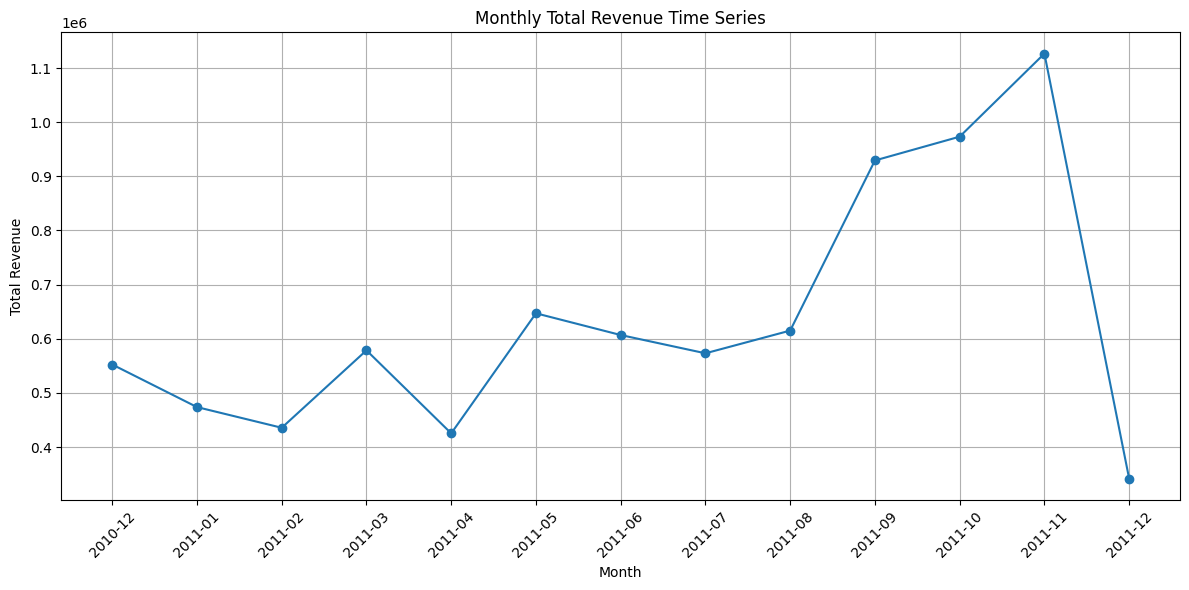

In [26]:
# Ensure 'InvoiceDate_' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate_'])

# Convert 'InvoiceMonth' to a string for plotting
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# Group the data by 'InvoiceMonth' and calculate total revenue for each month
revenue_by_month = df.groupby('InvoiceMonth')['TotalRevenue'].sum()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month.index, revenue_by_month.values, marker='o', linestyle='-')
plt.title('Monthly Total Revenue Time Series')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels fit in the plot area
plt.show()


# Revenue Forecast with Prophet

In [27]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Rename columns to 'ds' and 'y' for Prophet
data = df.rename(columns={'InvoiceDate': 'ds', 'TotalRevenue': 'y'})

# Ensure the 'ds' column is in datetime format
data['ds'] = pd.to_datetime(data['ds'])

# Check the first few rows of the data
data.head()

Importing plotly failed. Interactive plots will not work.


,InvoiceNo,StockCode,Description,Quantity,ds,UnitPrice,CustomerID,Country,InvoiceDate_,y,Recency,Frequency,Monetary,RFM_Score,CustomerSegment,R,F,M,Profit,Month,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12/1/2010 8:26,15.30,301,35,5288.63,142,NaN,1,4,2,15.30,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/1/2010 8:26,20.34,301,35,5288.63,142,NaN,1,4,2,20.34,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12/1/2010 8:26,22.00,301,35,5288.63,142,NaN,1,4,2,22.00,12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/1/2010 8:26,20.34,301,35,5288.63,142,NaN,1,4,2,20.34,12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12/1/2010 8:26,20.34,301,35,5288.63,142,NaN,1,4,2,20.34,12,2010-12


# Step 2: Train-Test Split
Next, we'll split the data into training and testing sets. We'll use the training set to train the Prophet model and the testing set to evaluate its performance. Please specify the percentage of data you want to allocate to the testing set (e.g., 20%).

In [28]:
# Split data into training and testing sets (e.g., 80% training, 20% testing)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]
# Check the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (321283, 21)
Testing data shape: (80321, 21)


## Step 3: Model Training and Forecasting
Now, we'll train the Prophet model using the training data and make forecasts on the testing data. We'll also visualize the results.


In [31]:
import numpy as np
# Initialize the Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(train_data)

# Create a DataFrame for future dates to make forecasts
future = pd.DataFrame({'ds': test_data['ds']})

# Make forecasts for future dates
forecast = model.predict(future)

# Extract forecasted values
forecasted_values = forecast['yhat']

# Calculate evaluation metrics
mae = mean_absolute_error(test_data['y'], forecasted_values)
mse = mean_squared_error(test_data['y'], forecasted_values)
rmse = np.sqrt(mse)

08:54:11 - cmdstanpy - INFO - Chain [1] start processing
08:54:26 - cmdstanpy - INFO - Chain [1] done processing


## Evaluate Forecast

In [32]:
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 19.73
Mean Squared Error (MSE): 710304.05
Root Mean Squared Error (RMSE): 842.80


## Visualize the forecast

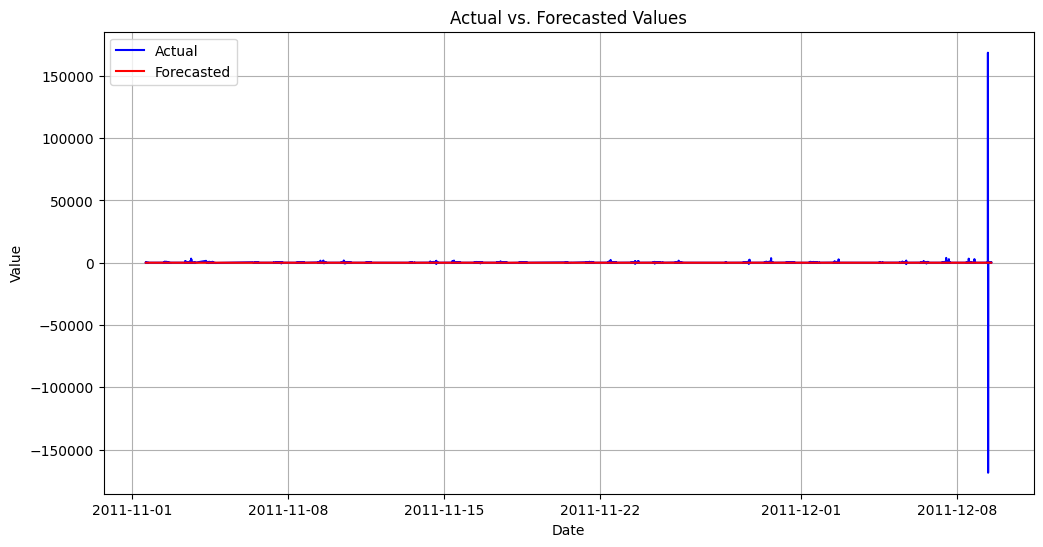

In [33]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(test_data['ds'], forecasted_values[:len(test_data)], label='Forecasted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Display the forecasted values for the testing period
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

,ds,yhat,yhat_lower,yhat_upper
0,2011-11-01 14:49:00,17.734924,-286.842296,306.468451
1,2011-11-01 14:49:00,17.734924,-265.625732,308.105056
2,2011-11-01 14:49:00,17.734924,-279.662769,336.083801
3,2011-11-01 14:49:00,17.734924,-278.115827,321.452881
4,2011-11-01 14:49:00,17.734924,-291.270284,309.810268


## Cross Validation

In [35]:
from prophet.diagnostics import performance_metrics, cross_validation
from prophet import Prophet



# Define the cross-validation horizon and period (e.g., 30 days)
cv_horizon = '30 days'
cv_period = '15 days'

# Perform cross-validation
df_cv = cross_validation(model, horizon=cv_horizon, period=cv_period)

# Calculate performance metrics
df_p = performance_metrics(df_cv)

  0%|          | 0/15 [00:00<?, ?it/s]

09:01:45 - cmdstanpy - INFO - Chain [1] start processing
09:01:48 - cmdstanpy - INFO - Chain [1] done processing
09:01:58 - cmdstanpy - INFO - Chain [1] start processing
09:02:04 - cmdstanpy - INFO - Chain [1] done processing
09:02:15 - cmdstanpy - INFO - Chain [1] start processing
09:02:23 - cmdstanpy - INFO - Chain [1] done processing
09:02:33 - cmdstanpy - INFO - Chain [1] start processing
09:02:37 - cmdstanpy - INFO - Chain [1] done processing
09:02:50 - cmdstanpy - INFO - Chain [1] start processing
09:02:58 - cmdstanpy - INFO - Chain [1] done processing
09:03:10 - cmdstanpy - INFO - Chain [1] start processing
09:03:15 - cmdstanpy - INFO - Chain [1] done processing
09:03:27 - cmdstanpy - INFO - Chain [1] start processing
09:03:34 - cmdstanpy - INFO - Chain [1] done processing
09:03:48 - cmdstanpy - INFO - Chain [1] start processing
09:03:53 - cmdstanpy - INFO - Chain [1] done processing
09:04:07 - cmdstanpy - INFO - Chain [1] start processing
09:04:14 - cmdstanpy - INFO - Chain [1]

# Plot Performance Metrrics

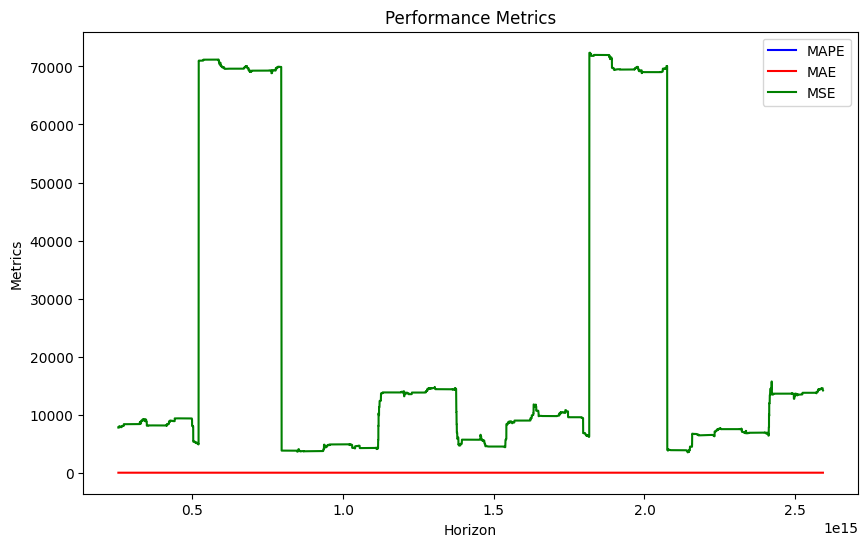

In [46]:
# Add 'y' and 'yhat' columns to the DataFrame
df_p['y'] = test_data['y']
df_p['yhat'] = forecast['yhat']

# Calculate MAPE
df_p['mape'] = abs((df_p['y'] - df_p['yhat']) / df_p['y']) * 100

# Plot performance metrics
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_p['horizon'], df_p['mape'], 'b', label='MAPE')
ax.plot(df_p['horizon'], df_p['mae'], 'r', label='MAE')
ax.plot(df_p['horizon'], df_p['mse'], 'g', label='MSE')
ax.set_xlabel('Horizon')
ax.set_ylabel('Metrics')
plt.legend(loc='upper right')
plt.title('Performance Metrics')
plt.show()

## Print performance metrics

In [47]:
# Print performance metrics
df_p

,horizon,mse,rmse,mae,mdape,smape,coverage,y,yhat,mape
0,2 days 22:43:00,7795.291330,88.290947,21.727501,0.927678,0.856919,0.995170,NaN,17.734924,NaN
1,2 days 22:44:00,7796.137775,88.295740,21.732793,0.927317,0.856536,0.995170,NaN,17.734924,NaN
2,2 days 22:45:00,7796.136175,88.295731,21.732437,0.927200,0.856470,0.995170,NaN,17.734924,NaN
3,2 days 22:46:00,7797.420291,88.303003,21.755039,0.925885,0.855920,0.995170,NaN,17.734924,NaN
4,2 days 22:47:00,7797.385508,88.302806,21.753933,0.925566,0.855779,0.995170,NaN,17.734924,NaN
...,...,...,...,...,...,...,...,...,...,...
11980,29 days 23:56:00,14201.162488,119.168630,23.061592,0.885872,0.858820,0.995801,NaN,27.419203,NaN
11981,29 days 23:57:00,14200.874678,119.167423,23.058920,0.885569,0.858777,0.995801,NaN,27.419203,NaN
11982,29 days 23:58:00,14200.587708,119.166219,23.055124,0.886696,0.859133,0.995801,NaN,27.419203,NaN
11983,29 days 23:59:00,14199.455621,119.161469,23.048126,0.886672,0.858993,0.995801,NaN,27.419203,NaN


## Visualize the forecast components, including trend, seasonality, and holidays

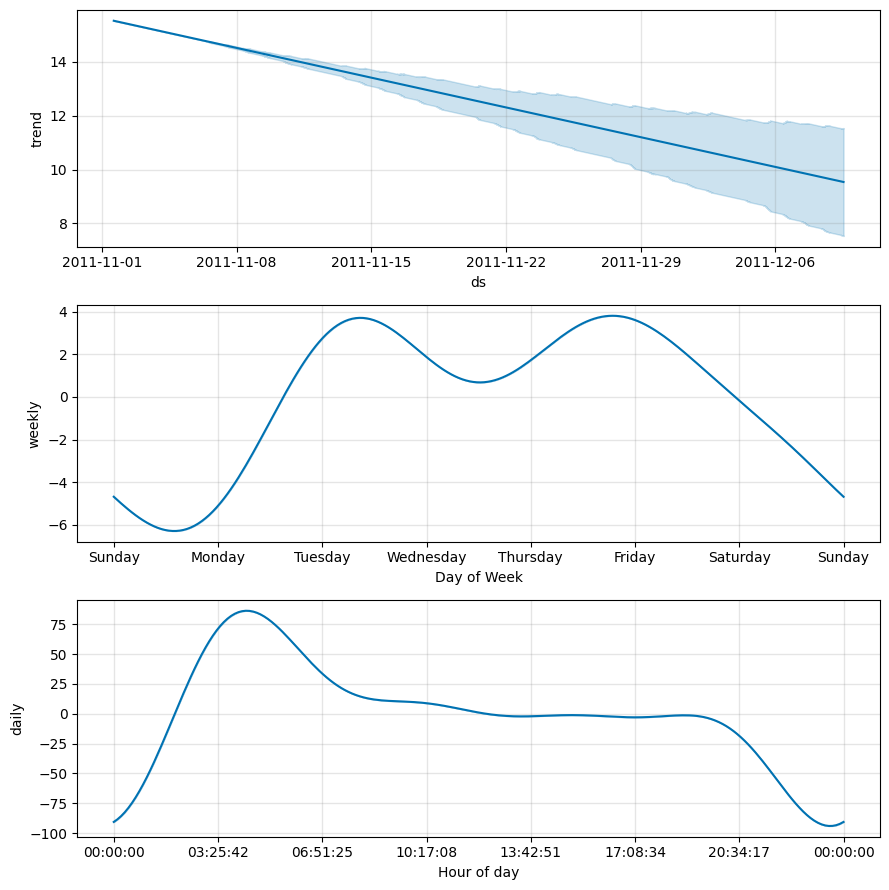

In [48]:
from prophet.plot import plot_components

# Plot forecast components
fig = model.plot_components(forecast)
plt.show()

## 12 months forecasts

In [49]:
future_dates = model.make_future_dataframe(periods=365)  # Forecast for the next 365 days
forecast = model.predict(future_dates)

## Evaluate the forecasts accuracy

In [50]:
# Extract the actual values from your original dataset for comparison
actual = data[['ds', 'y']]

# Merge the actual values with the forecasted values
forecasted = forecast[['ds', 'yhat']]

# Rename the columns for clarity
actual.columns = ['ds', 'actual']
forecasted.columns = ['ds', 'forecast']

# Merge actual and forecasted values
merged = actual.merge(forecasted, on='ds', how='inner')

# Calculate evaluation metrics (e.g., Mean Absolute Error, Mean Squared Error, etc.)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(merged['actual'], merged['forecast'])
mse = mean_squared_error(merged['actual'], merged['forecast'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 21.20948187486801
Mean Squared Error (MSE): 53853.4701115815
Root Mean Squared Error (RMSE): 232.0635044800916


## visualize the forecasted values alongside the actual values to get a better understanding of how well your model is performing

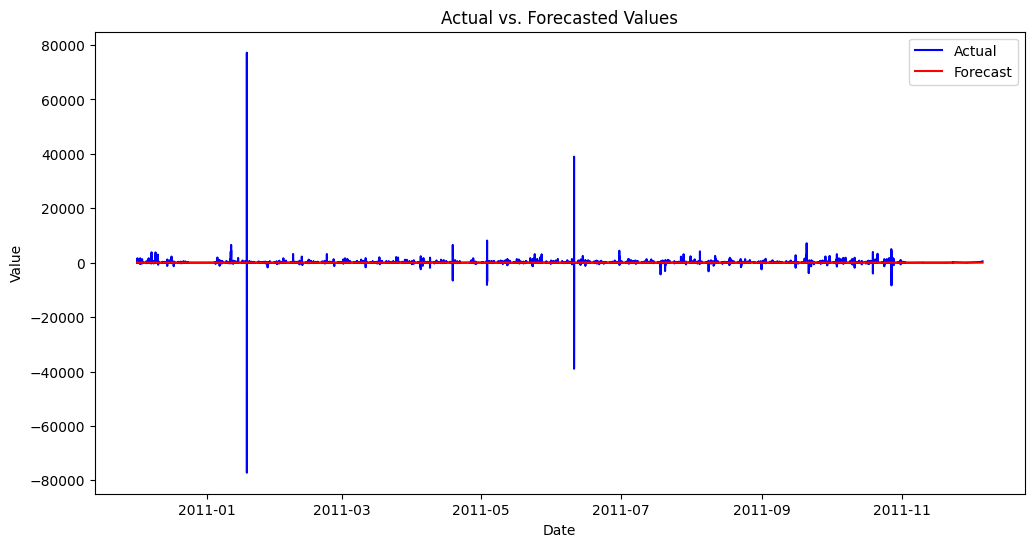

In [360]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(merged['ds'], merged['actual'], label='Actual', color='blue')
plt.plot(merged['ds'], merged['forecast'], label='Forecast', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Forecasted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Sales Forecastwith Prophet

09:27:34 - cmdstanpy - INFO - Chain [1] start processing
09:27:55 - cmdstanpy - INFO - Chain [1] done processing


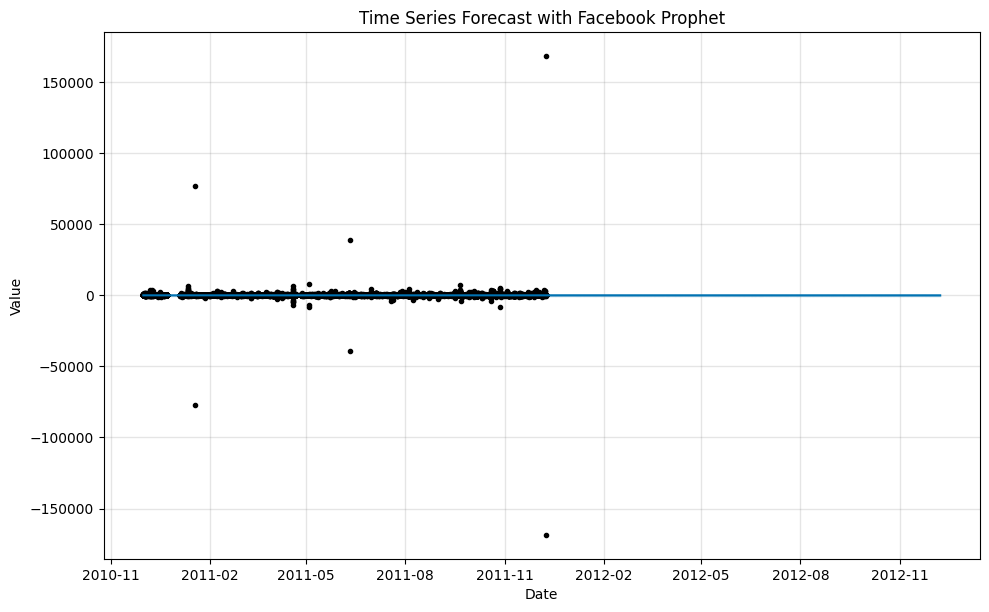

Mean Absolute Error (MAE): 14.111962219589097


In [52]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Create a DataFrame with future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Adjust 'periods' as needed

# Make predictions for the future dates
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
plt.title('Time Series Forecast with Facebook Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Access forecasted values for the next 10 days
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

# Evaluate the model (add your own evaluation metrics)
# For example, calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
actual_values = data['y'][-10:]  # Replace with your actual values
mae = mean_absolute_error(actual_values, forecasted_values['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

## Customer Segmentation Based on Purchase Patterns:

Segmenting customers based on their purchase behavior and preferences can helusou tailor marketing campaigns, product recommendations, and pricing strategies to different customer groups. One common approach for this is using clustering techniques.

Here's we you can perform customer segmentation based on purchase patterns:

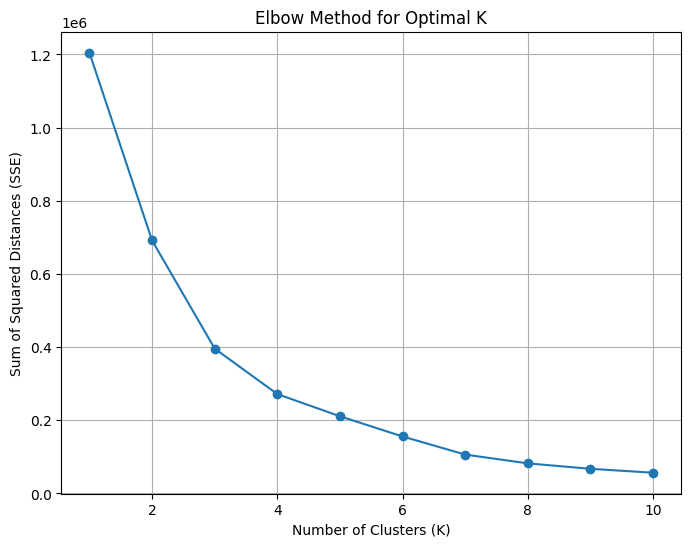

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame df with relevant customer data

# Select features for segmentation (e.g., 'Recency', 'Frequency', 'Monetary')
segmentation_data = df[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid()
plt.show()

##  Choose the Ooptimal_k
Let Choose the Ooptimal_k based on the Elbow Method

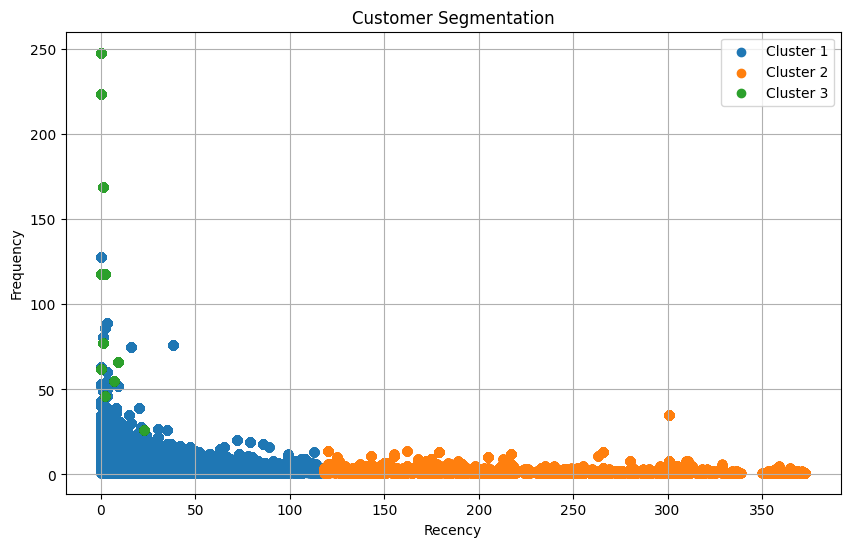

In [54]:
# Based on the Elbow Method, choose the optimal number of clusters (K)
optimal_k = 3 # Adjust this based on the plot

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(segmentation_data_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters (e.g., using scatter plots)
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], label=f'Cluster {cluster + 1}')

plt.title('Customer Segmentation')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

## Evaluate Cluster

In [55]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Calculate Silhouette Score
silhouette_avg = silhouette_score(df[['Recency', 'Frequency', 'Monetary']][:20000], df['Cluster'][:20000])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df[['Recency', 'Frequency', 'Monetary']][:20000], df['Cluster'][:20000])
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

Silhouette Score: -0.06
Davies-Bouldin Index: 1.04


## Customer Segmentation Analysis:

Now that we have performed customer segmentation using K-means clustering, we can analyze and interpret the segments:


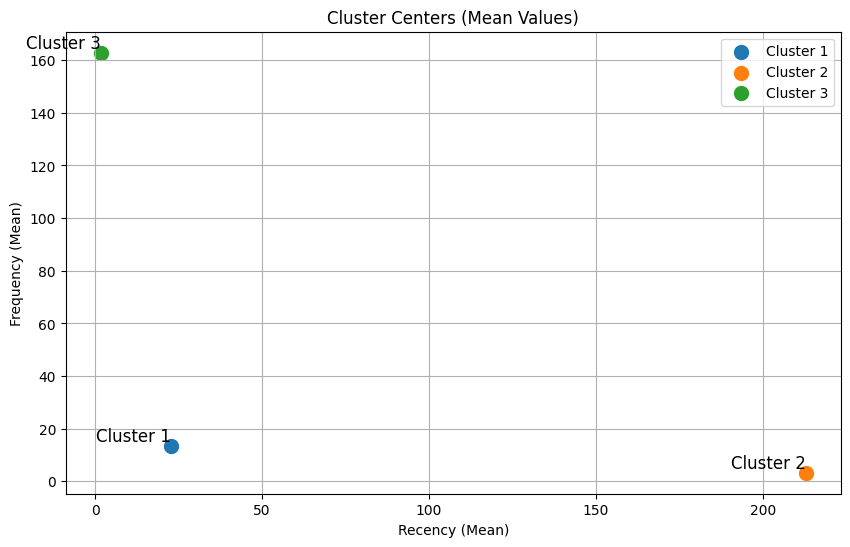

Cluster 1 Characteristics:
Recency        22.551549
Frequency      13.563173
Monetary     5510.151106
Name: 0, dtype: float64


Cluster 2 Characteristics:
Recency       212.819462
Frequency       3.285938
Monetary     1009.756861
Name: 1, dtype: float64


Cluster 3 Characteristics:
Recency          1.705276
Frequency      162.815972
Monetary     90483.508735
Name: 2, dtype: float64




In [56]:
# Analyze and interpret the segments

# Calculate the mean values of features for each cluster
cluster_means = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Visualize the cluster means
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(
        cluster_means.loc[cluster, 'Recency'],
        cluster_means.loc[cluster, 'Frequency'],
        s=100,
        label=f'Cluster {cluster + 1}',
    )
    plt.text(
        cluster_means.loc[cluster, 'Recency'],
        cluster_means.loc[cluster, 'Frequency'],
        f'Cluster {cluster + 1}',
        fontsize=12,
        ha='right',
        va='bottom',
    )

plt.title('Cluster Centers (Mean Values)')
plt.xlabel('Recency (Mean)')
plt.ylabel('Frequency (Mean)')
plt.legend()
plt.grid()
plt.show()

# Explore cluster characteristics (e.g., interpret the segments)
for cluster in range(optimal_k):
    print(f"Cluster {cluster + 1} Characteristics:")
    print(cluster_means.loc[cluster])
    print("\n")

## Customer Segmentation Profiling:

In addition to analyzing cluster characteristics,  we will create customer profiles or personas based on the segmentation to gain deeper insights into each customer segment. This can help in tailoring marketing strategies and offerings for different types of customers.

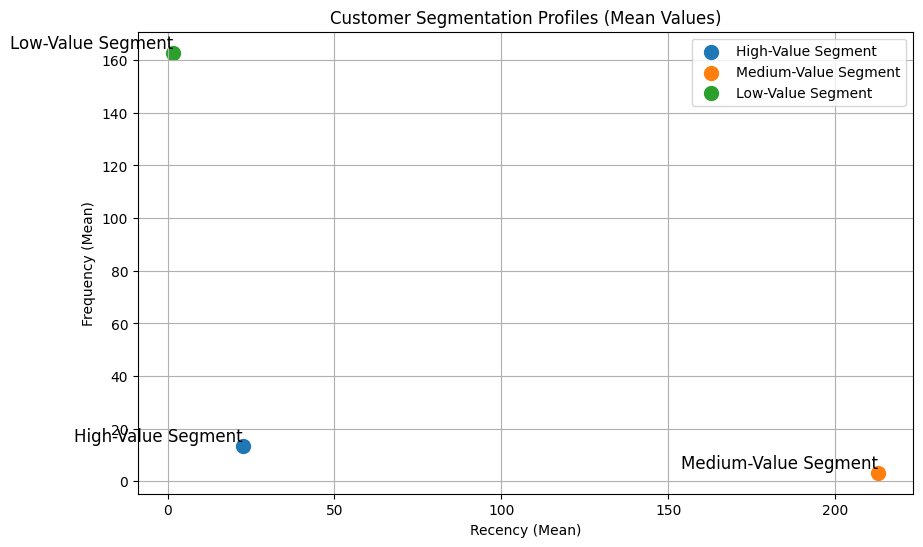

High-Value Segment Profile:
Recency        22.551549
Frequency      13.563173
Monetary     5510.151106
Name: High-Value, dtype: float64


Medium-Value Segment Profile:
Recency       212.819462
Frequency       3.285938
Monetary     1009.756861
Name: Medium-Value, dtype: float64


Low-Value Segment Profile:
Recency          1.705276
Frequency      162.815972
Monetary     90483.508735
Name: Low-Value, dtype: float64




In [57]:
# Create customer profiles for each cluster

# Define labels for segments (e.g., 'High-Value,' 'Medium-Value,' 'Low-Value')
segment_labels = ['High-Value', 'Medium-Value', 'Low-Value']

# Assign labels to each cluster based on their characteristics
df['Segment'] = df['Cluster'].apply(lambda x: segment_labels[x])

# Analyze customer profiles
segment_profiles = df.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()

# Visualize customer profiles
plt.figure(figsize=(10, 6))
for segment in segment_labels:
    plt.scatter(
        segment_profiles.loc[segment, 'Recency'],
        segment_profiles.loc[segment, 'Frequency'],
        s=100,
        label=f'{segment} Segment',
    )
    plt.text(
        segment_profiles.loc[segment, 'Recency'],
        segment_profiles.loc[segment, 'Frequency'],
        f'{segment} Segment',
        fontsize=12,
        ha='right',
        va='bottom',
    )

plt.title('Customer Segmentation Profiles (Mean Values)')
plt.xlabel('Recency (Mean)')
plt.ylabel('Frequency (Mean)')
plt.legend()
plt.grid()
plt.show()

# Explore customer profiles (interpret the segments)
for segment in segment_labels:
    print(f"{segment} Segment Profile:")
    print(segment_profiles.loc[segment])
    print("\n")

## Compare customer segments side by side

<Figure size 1200x600 with 0 Axes>

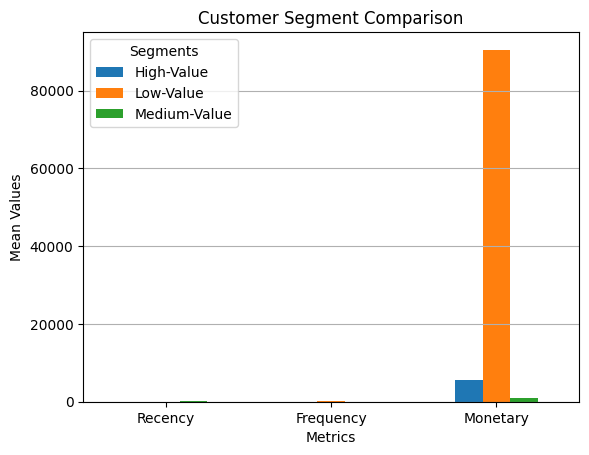

The segment with the highest Recency is: Medium-Value


In [58]:
# Compare customer segments side by side

# Visualize the mean values of Recency, Frequency, and Monetary for each segment
plt.figure(figsize=(12, 6))
segment_profiles.T.plot(kind='bar')
plt.title('Customer Segment Comparison')
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend(title='Segments')
plt.grid(axis='y')
plt.show()

# Explore differences between segments (e.g., which segment has the highest Recency)
highest_recency_segment = segment_profiles['Recency'].idxmax()
print(f"The segment with the highest Recency is: {highest_recency_segment}")


# Customer Lifetime Value (CLV) Analysis:

Customer Lifetime Value (CLV) is a crucial metric that estimates the total revenue a business can expect from a customer throughout their entire relationship. Calculating CLV can help you identify your most valuable customers and tailor your marketing and retention strategies accordingly.

Here's how we can perform CLV analysis:

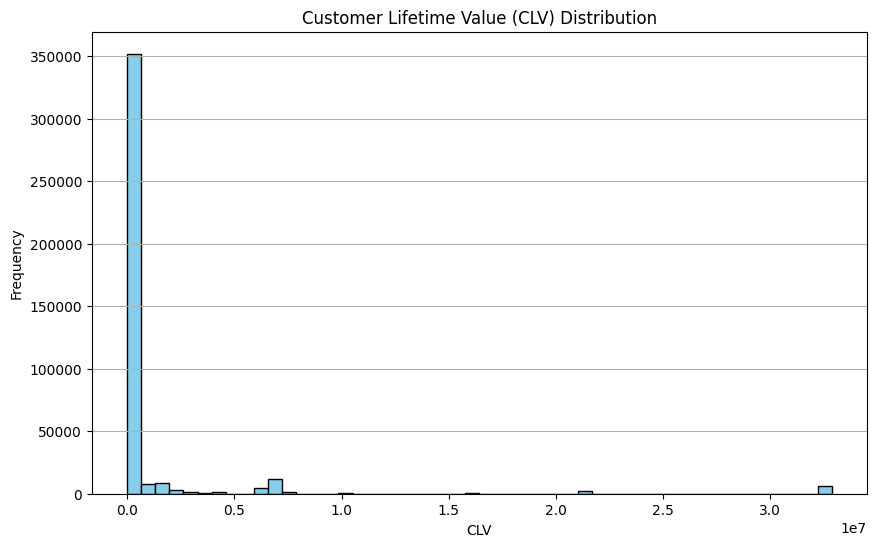

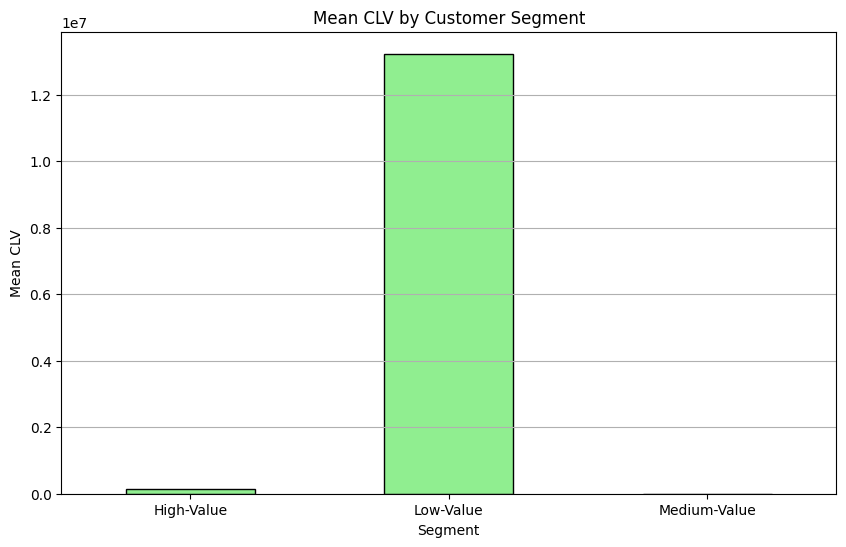

Mean CLV for High-Value Segment: $156358.66
Mean CLV for Low-Value Segment: $13232907.55
Mean CLV for Medium-Value Segment: $6084.80


In [59]:
# Calculate CLV for each customer
df['CLV'] = df['Frequency'] * df['Monetary']

# Visualize the distribution of CLV
plt.figure(figsize=(10, 6))
plt.hist(df['CLV'], bins=50, color='skyblue', edgecolor='black')
plt.title('Customer Lifetime Value (CLV) Distribution')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Calculate mean CLV for each customer segment
segment_mean_clv = df.groupby('Segment')['CLV'].mean()

# Visualize mean CLV by segment
plt.figure(figsize=(10, 6))
segment_mean_clv.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Mean CLV by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Mean CLV')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Explore insights from CLV analysis
for segment, mean_clv in segment_mean_clv.items():
    print(f"Mean CLV for {segment} Segment: ${mean_clv:.2f}")


## Visulize Clustering Characteristcs

Cluster Characteristics:
            Recency   Frequency      Monetary
Cluster                                      
0         22.551549   13.563173   5510.151106
1        212.819462    3.285938   1009.756861
2          1.705276  162.815972  90483.508735

Cluster Sizes:
Cluster
0    335263
1     37704
2     28637
dtype: int64


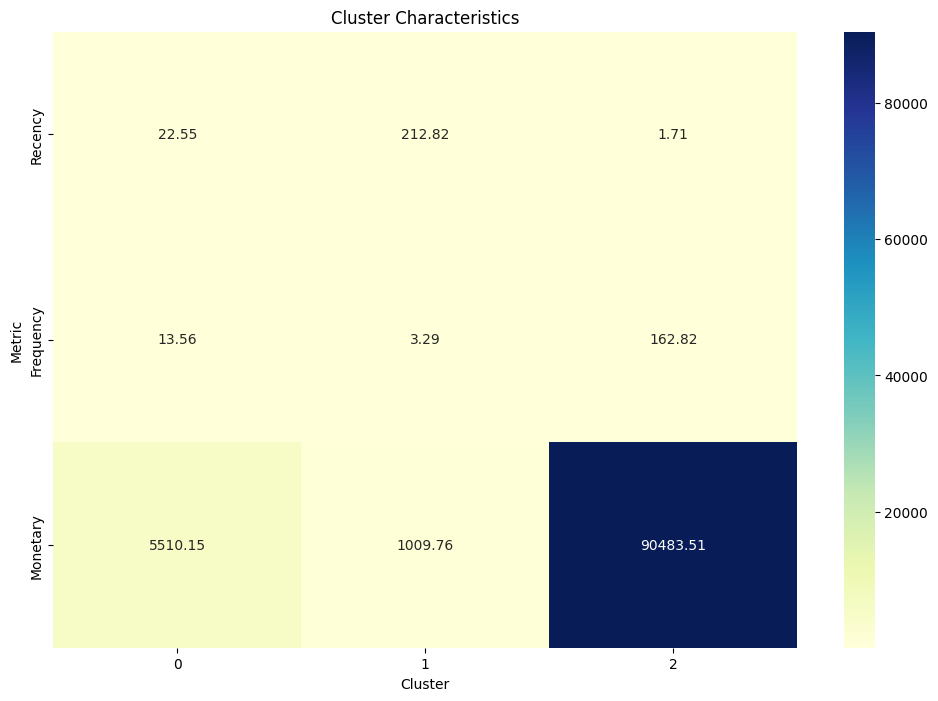

Segment Distribution within Clusters:
Segment  High-Value  Low-Value  Medium-Value
Cluster                                     
0            335263          0             0
1                 0          0         37704
2                 0      28637             0


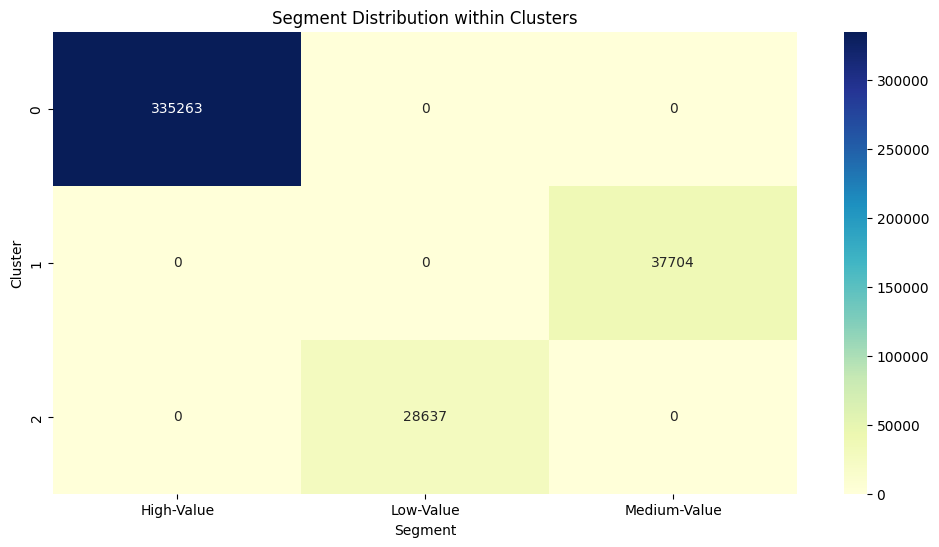

In [61]:
import seaborn as sns
# Explore cluster characteristics
cluster_means = df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
cluster_sizes = df.groupby('Cluster').size()

print("Cluster Characteristics:")
print(cluster_means)
print("\nCluster Sizes:")
print(cluster_sizes)

# Visualize the cluster characteristics
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Metric')
plt.show()

# Analyze segment distribution within clusters
segment_distribution = df.groupby(['Cluster', 'Segment']).size().unstack(fill_value=0)

print("Segment Distribution within Clusters:")
print(segment_distribution)

# Visualize segment distribution within clusters
plt.figure(figsize=(12, 6))
sns.heatmap(segment_distribution, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Segment Distribution within Clusters')
plt.xlabel('Segment')
plt.ylabel('Cluster')
plt.show()

## Visualize Clusters

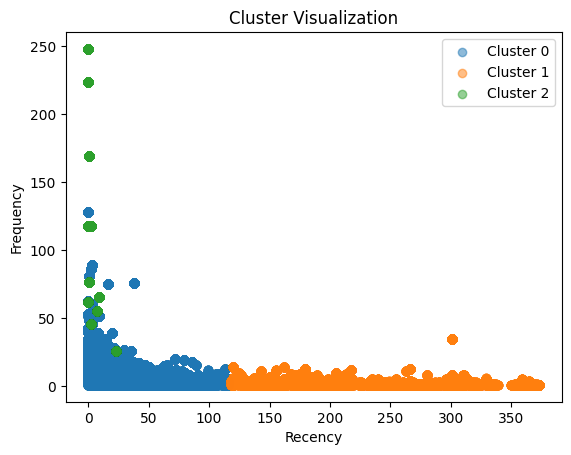

In [62]:
# Choose two dimensions for visualization (e.g., Recency and Frequency)
x_axis = 'Recency'
y_axis = 'Frequency'

# Create a scatter plot of the clusters
plt.scatter(df[df['Cluster'] == 0][x_axis], df[df['Cluster'] == 0][y_axis], label='Cluster 0', alpha=0.5)
plt.scatter(df[df['Cluster'] == 1][x_axis], df[df['Cluster'] == 1][y_axis], label='Cluster 1', alpha=0.5)
plt.scatter(df[df['Cluster'] == 2][x_axis], df[df['Cluster'] == 2][y_axis], label='Cluster 2', alpha=0.5)

# Customize the plot
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.legend()
plt.title('Cluster Visualization')

# Show the plot
plt.show()

          Frequency     Recency      Monetary
Cluster                                      
0         13.563173   22.551549   5510.151106
1          3.285938  212.819462   1009.756861
2        162.815972    1.705276  90483.508735


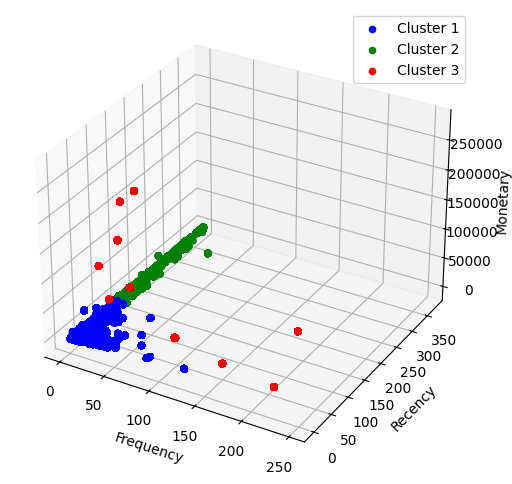

In [63]:
# Determine the number of unique clusters
num_clusters = df['Cluster'].nunique()

segmentation_features = ['Frequency', 'Recency', 'Monetary']

# Analyze and profile the segments
segment_profiles = df.groupby('Cluster')[segmentation_features].mean()

# Optionally, we can assign meaningful names to the clusters based on our analysis
# cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']
# df['Cluster Name'] = df['Cluster'].map(dict(zip(range(num_clusters), cluster_names)))

# Visualize the segments or perform further analysis as needed

# Print cluster profiles
print(segment_profiles)

# Visualize the clusters (for 3D data)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'green', 'red', 'purple']

for i in range(num_clusters):
    ax.scatter(df[df['Cluster'] == i]['Frequency'],
               df[df['Cluster'] == i]['Recency'],
               df[df['Cluster'] == i]['Monetary'],
               c=colors[i],
               label=f'Cluster {i + 1}')

ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

## Customer Segmentation Analysis:

Explore the characteristics of each customer segment further. For example, analyze demographics or behavioral patterns within each segment.

In [64]:
# Analyze demographics within clusters
# Calculate the 'Total' column (Quantity * UnitPrice)
df['Total'] = df['Quantity'] * df['UnitPrice']
segment_profiles['Total'] = df['Total'].copy()
cluster_demographics = segment_profiles.groupby('Cluster')['Total'].mean()
print(cluster_demographics)

Cluster
0    15.30
1    20.34
2    22.00
Name: Total, dtype: float64


# Customer Retention Analysis:

Analyze customer retention rates and factors contributing to customer retention.


In [65]:
# Calculate retention rate for each customer
df['Retention'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique') / df.groupby('CustomerID')['InvoiceNo'].transform('nunique').shift(1)
# Calculate customer retention rate for each cluster
retention_rate = df.groupby('Cluster')['Retention'].mean()
print(retention_rate)

Cluster
0    1.107955
1    0.980178
2    2.245259
Name: Retention, dtype: float64


# AA/B Testing:

Let's perform A/B testing to assess the impact of changes or interventions on customer behavior.

In [67]:
from scipy import stats
discounted_products = ['85123A', '22138']
df['Discounted'] = np.where(df['StockCode'].isin(discounted_products), 1, 0)

# Split the dataset into Group A (Control) and Group B (Experimental) based on the 'Discounted' column
group_a = df[df['Discounted'] == 0]
group_b = df[df['Discounted'] == 1]

# Calculate Total Revenue for Group A and Group B
total_revenue_group_a = group_a['TotalRevenue'].sum()
total_revenue_group_b = group_b['TotalRevenue'].sum()

# Perform a two-sample t-test to determine if there's a statistically significant difference
# between Total Revenue in Group A and Group B
t_statistic, p_value = stats.ttest_ind(group_a['TotalRevenue'], group_b['TotalRevenue'])

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("There is a statistically significant difference between Group A and Group B.")
    if total_revenue_group_b > total_revenue_group_a:
        print("Offering discounts increases Total Revenue.")
    else:
        print("Offering discounts decreases Total Revenue.")
else:
    print("There is no statistically significant difference between Group A and Group B.")

There is a statistically significant difference between Group A and Group B.
Offering discounts decreases Total Revenue.


# Collaborative filtering Products Recommedation System

To build a customer recommendation system based on how clustomers are clustered, we'll use collaborative filtering. Collaborative filtering recommends products to users based on their historical interactions (purchases in this case) and the preferences of similar users. Here's how you can do it:

In [68]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Let's assume we're focusing on a specific cluster, e.g., Cluster 0
cluster_data = df[df['Cluster'] == 0]

# Create a user-item interaction matrix
interaction_matrix = pd.pivot_table(cluster_data, values='Quantity', index='CustomerID', columns='StockCode', fill_value=0)

# Calculate item-item similarity (cosine similarity)
item_similarity = cosine_similarity(interaction_matrix.T)

# Create a DataFrame with product IDs as columns and similarity scores
item_similarity_df = pd.DataFrame(item_similarity, columns=interaction_matrix.columns, index=interaction_matrix.columns)

# Define a function to get product recommendations for a given product
def get_product_recommendations(product_id, num_recommendations=5):
    if product_id not in interaction_matrix.columns:
        return "Product not found in the cluster."
    
    # Get similar products for the given product
    similar_products = item_similarity_df[product_id]
    # Sort similar products by similarity score in descending order
    similar_products = similar_products.sort_values(ascending=False)
    # Exclude the input product itself
    similar_products = similar_products.drop(product_id)
    # Get the top N recommendations
    top_recommendations = similar_products.head(num_recommendations)
    
    # Get product descriptions for the recommendations
    recommendations_info = df[df['StockCode'].isin(top_recommendations.index)][['StockCode', 'Description']].drop_duplicates()
    
    return recommendations_info

# Example: Get product recommendations for a specific product (replace 'your_product_id' with an actual product ID)
recommended_products = get_product_recommendations('85123A')
print(recommended_products)


      StockCode                        Description
60       82494L        WOODEN FRAME ANTIQUE WHITE 
83        21733   RED HANGING HEART T-LIGHT HOLDER
155       82484  WOOD BLACK BOARD ANT WHITE FINISH
2045      22507       MEMO BOARD RETROSPOT  DESIGN
38574    35095A     BLUE VICTORIAN FABRIC OVAL BOX


# Time Series Forecast with ARIMA Model
Sales forecast 

## Data Preparation:
Import the necessary libraries, including Pandas and Matplotlib.
Load your dataset into a Pandas DataFrame.
Convert the 'InvoiceDate' column to datetime format and set it as the index.
Ensure that the data is sorted by date


In [69]:
# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set 'InvoiceDate' as the index
df.set_index('InvoiceDate', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)

## Resampling:
Depending on your forecasting needs, we can resample the data to a specific frequency, such as daily or monthly, and calculate the total revenue for each period.
For example, to resample the data to daily frequency and calculate daily total revenue:

In [76]:
# Resample to daily frequency and calculate daily total revenue
daily_sales = df['TotalRevenue'].resample('D').sum()

## Checking Stationarity:
Check if the time series data is stationary using the Dickey-Fuller test. If it's not stationary, we might need to difference the data.


In [77]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    if result[1] <= 0.05:
        print('Stationary (Reject H0)')
    else:
        print('Non-Stationary (Fail to reject H0)')
        print('Performing differencing...')
        
        # Apply differencing
        timeseries_diff = timeseries.diff().dropna()
        
        # Check stationarity after differencing
        check_stationarity(timeseries_diff)

# Check stationarity
check_stationarity(daily_sales)


ADF Statistic: -2.062775634855649
p-value: 0.2597436263864335
Critical Values: {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}
Non-Stationary (Fail to reject H0)
Performing differencing...
ADF Statistic: -8.647245009468627
p-value: 5.230339893016228e-14
Critical Values: {'1%': -3.4486972813047574, '5%': -2.8696246923288418, '10%': -2.571077032068342}
Stationary (Reject H0)


## ARIMA Modeling:
Based on the results of stationarity and ACF/PACF plots, select appropriate ARIMA(p, d, q) orders.
we can manually specify the orders or use an automated method like auto_arima.

In [78]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Automatically determine the best ARIMA parameters
model = auto_arima(daily_sales, seasonal=False, stepwise=True, suppress_warnings=True)
best_order = model.get_params()['order']

print(f'Best ARIMA Order: {best_order}')

# Fit the ARIMA model with the best parameters
model = ARIMA(daily_sales, order=best_order)
model_fit = model.fit()


Best ARIMA Order: (0, 1, 2)


## Forecasting:
We will use the fitted ARIMA model to make forecasts for future periods.

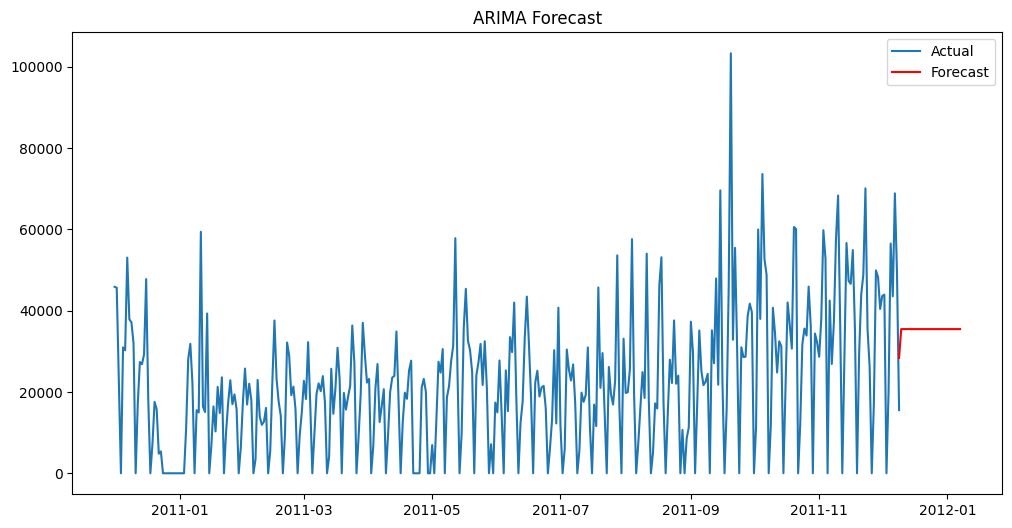

In [79]:
# Forecast
forecast_steps = 30  # Adjust as needed
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date index for the forecasted values
forecast_index = pd.date_range(start=daily_sales.index[-1], periods=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales, label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

## Evaluate the Forecast
To evaluate the forecast, you can use various metrics to assess its accuracy. Here are some common metrics you can calculate:

Mean Absolute Error (MAE): This measures the average absolute difference between the forecasted values and the actual values. A lower MAE indicates better accuracy.

Mean Squared Error (MSE): This measures the average of the squared differences between forecasted and actual values. It penalizes larger errors more heavily.

Root Mean Squared Error (RMSE): This is the square root of MSE and provides an interpretable metric in the same units as the original data.


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(daily_sales[-forecast_steps:], forecast)

# Calculate MSE
mse = mean_squared_error(daily_sales[-forecast_steps:], forecast)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((daily_sales[-forecast_steps:] - forecast) / daily_sales[-forecast_steps:])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 16833.897962687475
Mean Squared Error (MSE): 422541247.5407327
Root Mean Squared Error (RMSE): 20555.808121811526


## Compare Predicted with Actual

In [81]:
# Create a DataFrame with actual and predicted values
forecasted_vs_actual = pd.DataFrame({'Actual': daily_sales[-forecast_steps:], 'Forecast': forecast}, index=forecast_index[1:])

# Print the DataFrame
print(forecasted_vs_actual)

            Actual      Forecast
2011-12-10     NaN  28375.794246
2011-12-11     NaN  35472.680982
2011-12-12     NaN  35472.680982
2011-12-13     NaN  35472.680982
2011-12-14     NaN  35472.680982
2011-12-15     NaN  35472.680982
2011-12-16     NaN  35472.680982
2011-12-17     NaN  35472.680982
2011-12-18     NaN  35472.680982
2011-12-19     NaN  35472.680982
2011-12-20     NaN  35472.680982
2011-12-21     NaN  35472.680982
2011-12-22     NaN  35472.680982
2011-12-23     NaN  35472.680982
2011-12-24     NaN  35472.680982
2011-12-25     NaN  35472.680982
2011-12-26     NaN  35472.680982
2011-12-27     NaN  35472.680982
2011-12-28     NaN  35472.680982
2011-12-29     NaN  35472.680982
2011-12-30     NaN  35472.680982
2011-12-31     NaN  35472.680982
2012-01-01     NaN  35472.680982
2012-01-02     NaN  35472.680982
2012-01-03     NaN  35472.680982
2012-01-04     NaN  35472.680982
2012-01-05     NaN  35472.680982
2012-01-06     NaN  35472.680982
2012-01-07     NaN  35472.680982


In [82]:
# Ensure the "InvoiceDate" column is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate_'])

# Extract the year and month from the "InvoiceDate" column
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Group the data by year and month and sum the "TotalRevenue" for each month
monthly_sales = df.groupby(['Year', 'Month'])['TotalRevenue'].sum().reset_index()

# Rename the columns to "Year," "Month," and "MonthlySales"
monthly_sales.rename(columns={'Year': 'Year', 'Month': 'Month', 'TotalRevenue': 'MonthlySales'}, inplace=True)

# Create a DateTime index based on the "Year" and "Month" columns
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

# Set the "Date" column as the index
monthly_sales.set_index('Date', inplace=True)

# Drop the "Year" and "Month" columns if not needed
monthly_sales.drop(['Year', 'Month'], axis=1, inplace=True)

# Display the resulting DataFrame with monthly sales
print(monthly_sales)

            MonthlySales
Date                    
2010-12-01    552372.860
2011-01-01    473731.900
2011-02-01    435534.070
2011-03-01    578576.210
2011-04-01    425222.671
2011-05-01    647011.670
2011-06-01    606862.520
2011-07-01    573112.321
2011-08-01    615078.090
2011-09-01    929356.232
2011-10-01    973306.380
2011-11-01   1126815.070
2011-12-01    341539.430


# Seasonality Analysis

To explore whether there are any seasonal patterns in the sales data, we can use various visualization techniques. One common approach is to create seasonal decomposition plots, which help identify repeating patterns over time, such as daily, weekly, or monthly seasonality

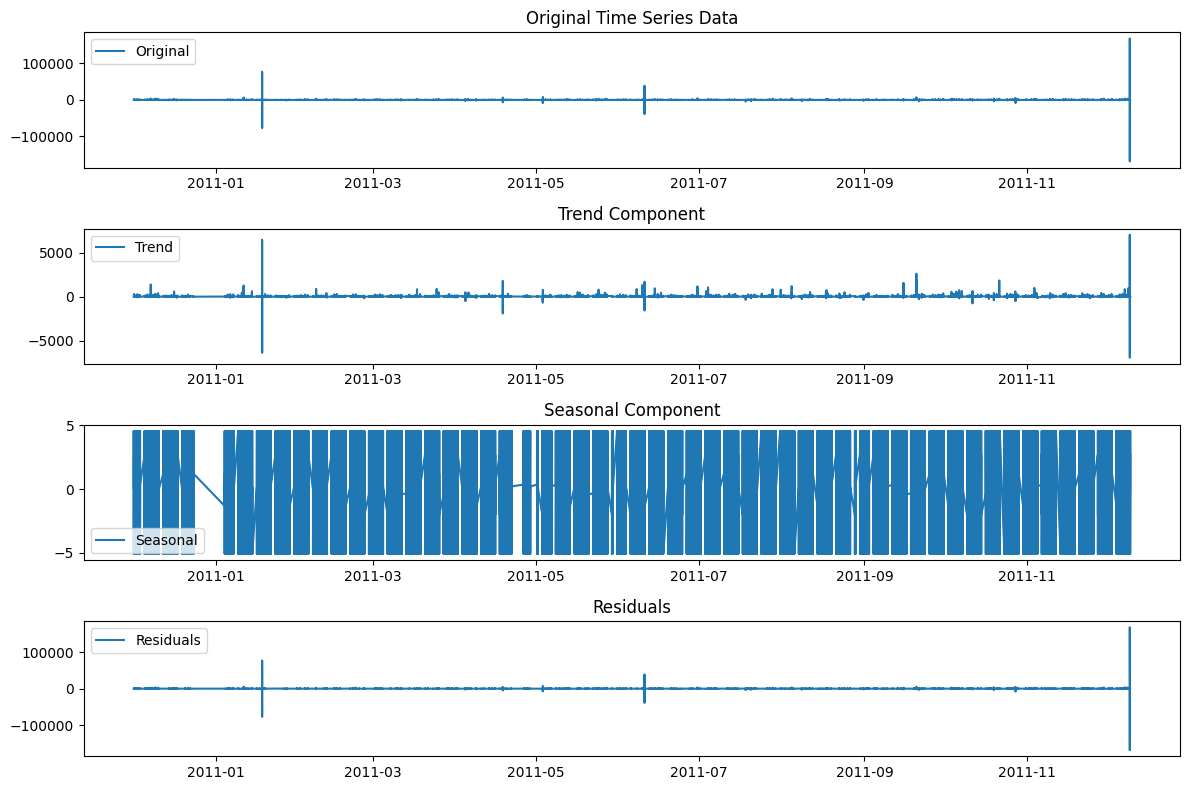

In [85]:
import statsmodels.api as sm
# Select relevant columns and rename them as required
timeseries_data = df[['InvoiceDate_', 'TotalRevenue']]
# Select relevant columns and rename them as required
timeseries_data = timeseries_data[['InvoiceDate_', 'TotalRevenue']]
timeseries_data.columns = ['ds', 'y']

# Convert 'ds' column to datetime format
timeseries_data['ds'] = pd.to_datetime(timeseries_data['ds'])

# Set the frequency of the time series data
timeseries_data.set_index('ds', inplace=True)

# Perform seasonal decomposition with explicit frequency
decomposition = sm.tsa.seasonal_decompose(timeseries_data['y'], model='additive', period=12)

# Plot the original time series data, seasonal component, and residuals
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(timeseries_data.index, timeseries_data['y'], label='Original')
plt.title('Original Time Series Data')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend.index, decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid.index, decomposition.resid, label='Residuals')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

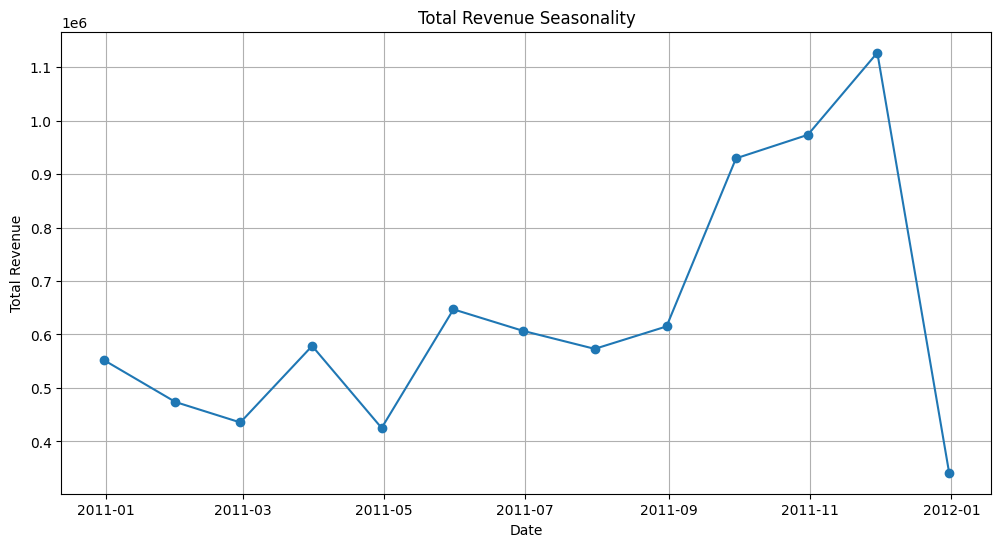

In [86]:
# Select relevant columns
timeseries_data = df[['InvoiceDate_', 'TotalRevenue']]

# Convert 'InvoiceDate_' column to datetime format
timeseries_data['InvoiceDate_'] = pd.to_datetime(timeseries_data['InvoiceDate_'])

# Set the 'InvoiceDate_' column as the index
timeseries_data.set_index('InvoiceDate_', inplace=True)

# Resample the data to explore seasonality
# You can choose the frequency (e.g., 'D' for daily, 'W' for weekly, 'M' for monthly)
resampled_data = timeseries_data['TotalRevenue'].resample('M').sum()

# Plot the resampled data to visualize seasonality
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Seasonality')
plt.grid(True)
plt.show()


# Anomaly Analysis

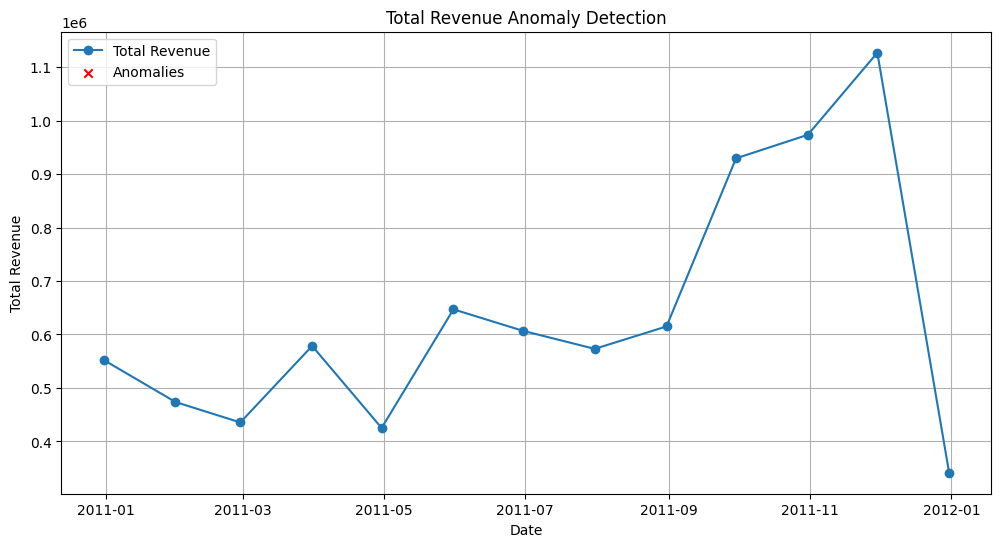

Anomaly Dates:
DatetimeIndex([], dtype='datetime64[ns]', name='InvoiceDate_', freq=None)


In [87]:
from scipy import stats
# Select relevant columns
timeseries_data = df[['InvoiceDate_', 'TotalRevenue']]

# Convert 'InvoiceDate_' column to datetime format
timeseries_data['InvoiceDate_'] = pd.to_datetime(timeseries_data['InvoiceDate_'])

# Set the 'InvoiceDate_' column as the index
timeseries_data.set_index('InvoiceDate_', inplace=True)

# Resample the data to explore seasonality (e.g., monthly)
resampled_data = timeseries_data['TotalRevenue'].resample('M').sum()

# Calculate the z-score for each data point
z_scores = np.abs(stats.zscore(resampled_data))

# Set a threshold for anomaly detection (e.g., z-score > 3)
threshold = 3

# Find the indices of anomalous data points
anomalies_indices = np.where(z_scores > threshold)[0]

# Plot the total revenue data with detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data.values, marker='o', label='Total Revenue')
plt.scatter(resampled_data.index[anomalies_indices], resampled_data.values[anomalies_indices], color='red', marker='x', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Anomaly Detection')
plt.grid(True)
plt.legend()
plt.show()

# Print the dates of detected anomalies
anomaly_dates = resampled_data.index[anomalies_indices]
print("Anomaly Dates:")
print(anomaly_dates)

# Monthly Sales Revenue Forecast with Arima

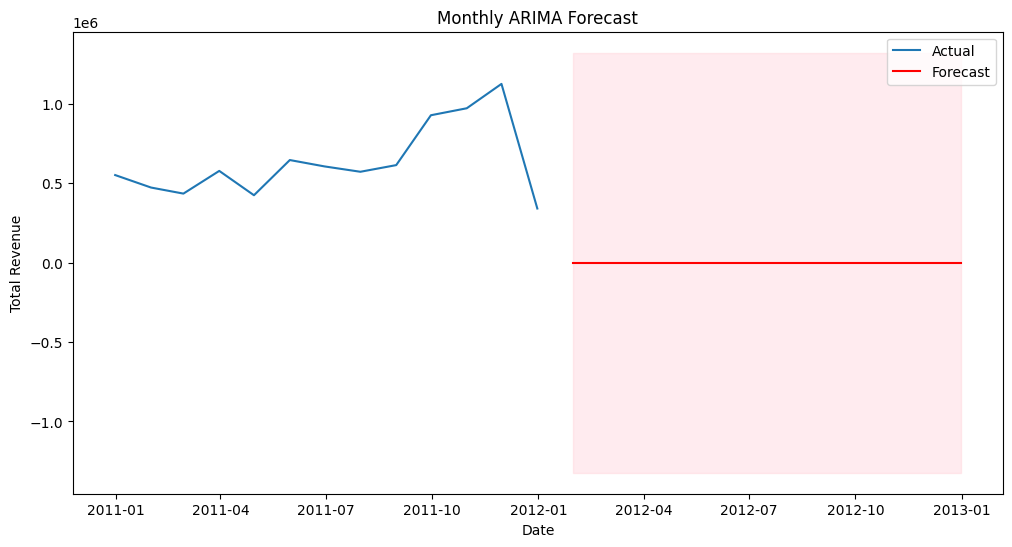

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

# Convert 'InvoiceDate' column to datetime
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set 'InvoiceDate' as the index
#df.set_index('InvoiceDate', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Resample the data to monthly frequency and sum the 'TotalRevenue' column
monthly_df = df['TotalRevenue'].resample('M').sum()

# Check for stationarity
def check_stationarity(data):
    result = adfuller(data)
    p_value = result[1]
    if p_value <= 0.05:
        return "Stationary (p-value: {:.4f})".format(p_value)
    else:
        return "Non-Stationary (p-value: {:.4f})".format(p_value)

# If data is not stationary, apply differencing
if check_stationarity(monthly_df) == "Non-Stationary":
    monthly_df_diff = monthly_df - monthly_df.shift(1)
    monthly_df_diff.dropna(inplace=True)
else:
    monthly_df_diff = monthly_df

# Determine the best ARIMA parameters using auto_arima
best_model = auto_arima(monthly_df_diff, seasonal=True, stepwise=True, suppress_warnings=True, error_action="ignore")

# Get the best ARIMA order
best_order = best_model.get_params()['order']

# Fit the ARIMA model with the best parameters
model = SARIMAX(monthly_df, order=best_order)
model_fit = model.fit(disp=0)

# Forecast future values
forecast_steps = 12  # Adjust as needed for the number of months to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Monthly ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(monthly_df[-forecast_steps:], forecast_mean)
print("Mean Absolute Error (MAE): {:.2f}".format(mae))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(monthly_df[-forecast_steps:], forecast_mean)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((monthly_df[-forecast_steps:] - forecast_mean) / monthly_df[-forecast_steps:])) * 100


Mean Absolute Error (MAE): 643845.55
Mean Squared Error (MSE): 468395941502.12
Root Mean Squared Error (RMSE): 684394.58


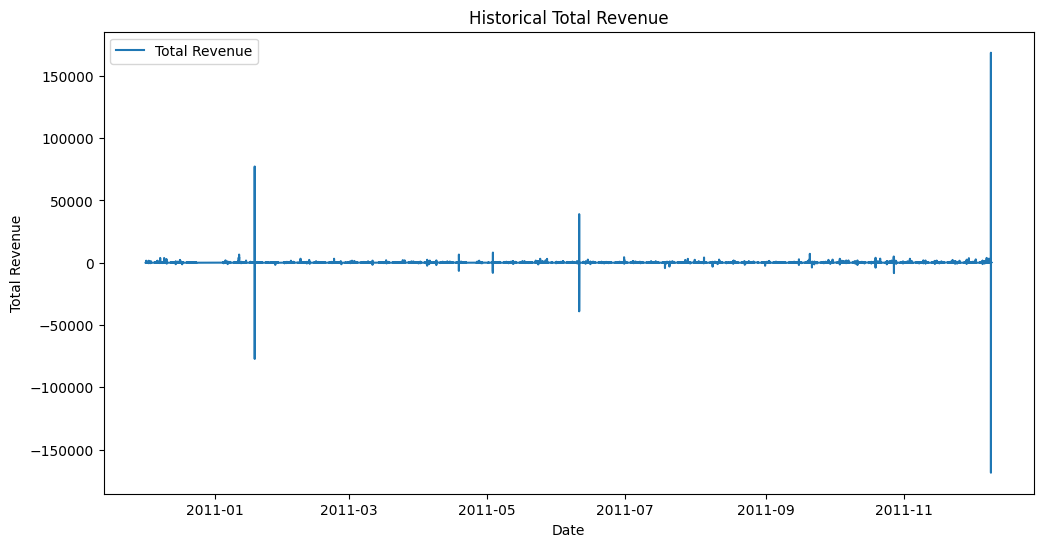

09:40:01 - cmdstanpy - INFO - Chain [1] start processing
09:40:25 - cmdstanpy - INFO - Chain [1] done processing


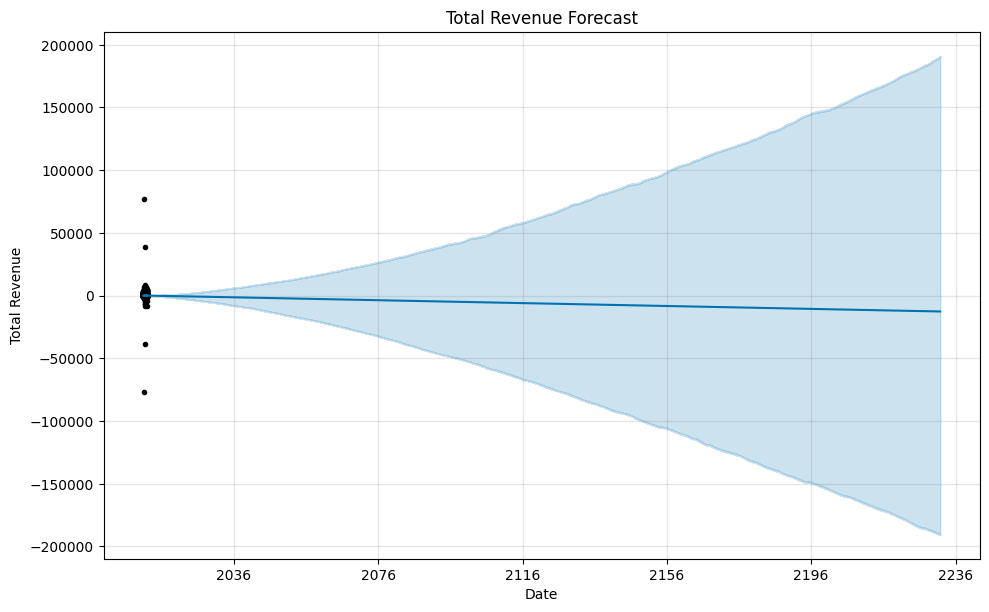

In [90]:
# Select relevant columns and rename them as required by Prophet
timeseries_data = df[['InvoiceDate_', 'TotalRevenue']]
timeseries_data.columns = ['ds', 'y']

# Convert 'ds' column to datetime format
timeseries_data['ds'] = pd.to_datetime(timeseries_data['ds'])

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(timeseries_data['ds'], timeseries_data['y'], label='Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Historical Total Revenue')
plt.legend()
plt.show()

# Split data into training and testing sets
train_size = int(0.8 * len(timeseries_data))
train_timeseries_data = timeseries_data[:train_size]
test_timeseries_data = timeseries_data[train_size:]

# Create and train the Prophet model
model = Prophet()
model.fit(train_timeseries_data)

# Make future predictions
future = model.make_future_dataframe(periods=len(test_timeseries_data))
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Forecast')
plt.show()


# Time Series with Exponential Smoothing

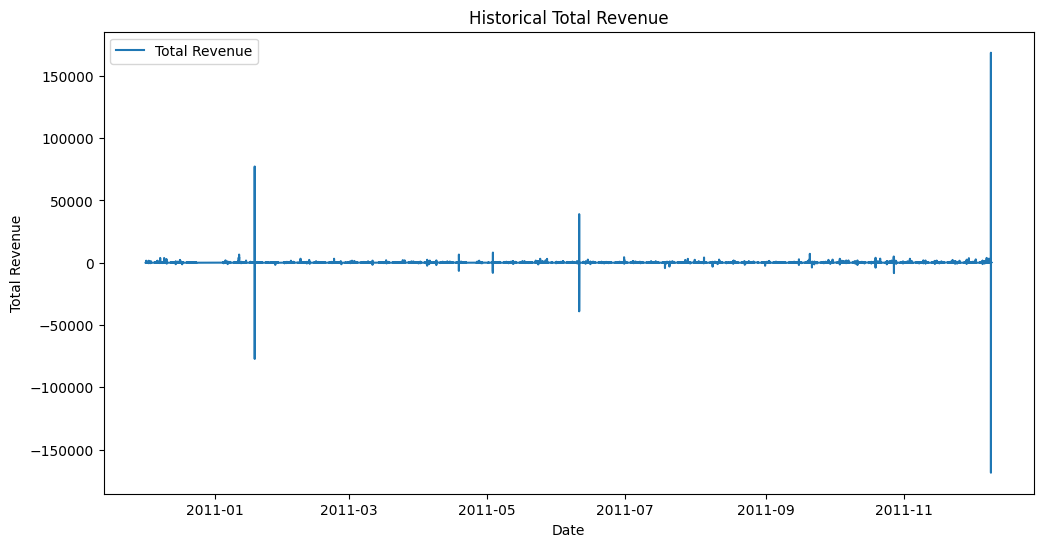

In [93]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Select relevant columns and rename them as required by Prophet
#timeseries_data = timeseries_data[['InvoiceDate_', 'TotalRevenue']]
#timeseries_data.columns = ['ds', 'y']

# Convert 'ds' column to datetime format
timeseries_data['ds'] = pd.to_datetime(timeseries_data['ds'])

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(timeseries_data['ds'], timeseries_data['y'], label='Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Historical Total Revenue')
plt.legend()
plt.show()

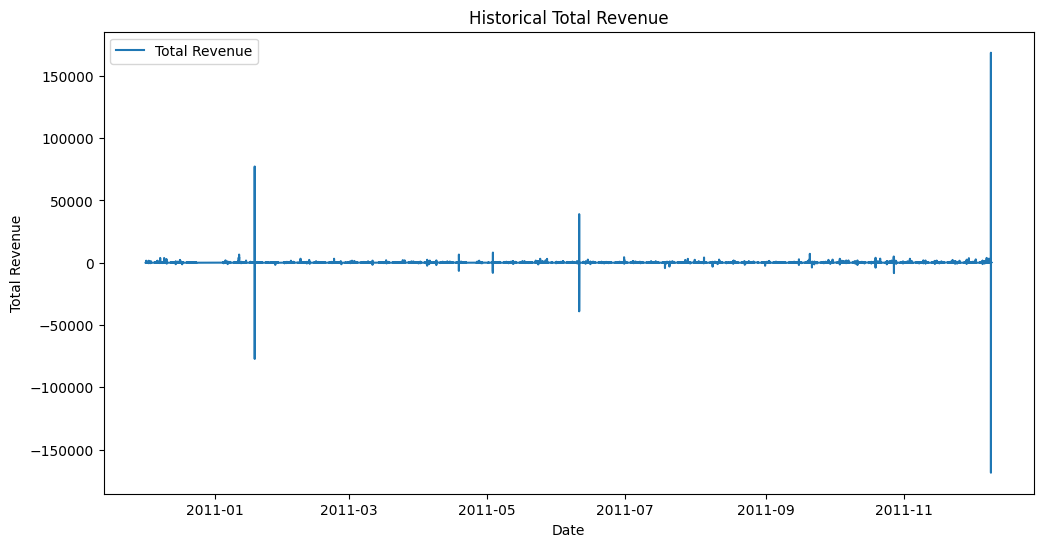

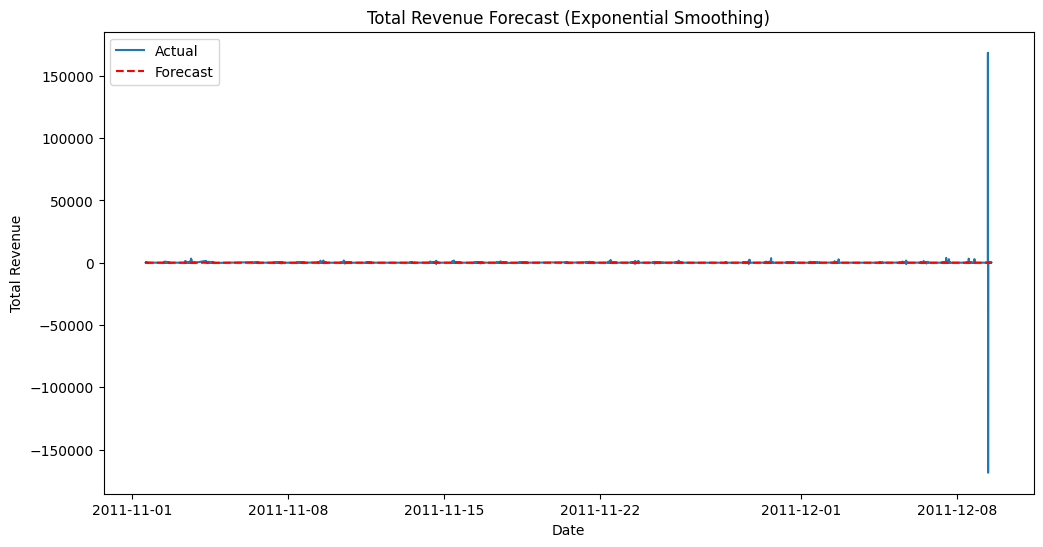

Mean Absolute Error: 19.754432667667114
Mean Squared Error: 710338.0743370486
Root Mean Squared Error: 842.8155636537857


In [100]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Select relevant columns and rename them as required
#timeseries_data = timeseries_data[['InvoiceDate_', 'TotalRevenue']]
#timeseries_data.columns = ['ds', 'y']

# Convert 'ds' column to datetime format
timeseries_data['ds'] = pd.to_datetime(timeseries_data['ds'])

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(timeseries_data['ds'], timeseries_data['y'], label='Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Historical Total Revenue')
plt.legend()
plt.show()

# Split data into training and testing sets
train_size = int(0.8 * len(timeseries_data))
train_timeseries_data = timeseries_data[:train_size]
test_timeseries_data = timeseries_data[train_size:]

# Create and train the Exponential Smoothing model
model = ExponentialSmoothing(train_timeseries_data['y'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Make future predictions
forecast = model_fit.forecast(steps=len(test_timeseries_data))

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(test_timeseries_data['ds'], test_timeseries_data['y'], label='Actual')
plt.plot(test_timeseries_data['ds'], forecast, label='Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Forecast (Exponential Smoothing)')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(test_timeseries_data['y'], forecast)
mse = mean_squared_error(test_timeseries_data['y'], forecast)
rmse = mse**0.5

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Churn Column creation for analysis

In [101]:
# Convert 'InvoiceDate' to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate_'])

# Calculate the cutoff date for churn determination (e.g., the last date in the dataset)
cutoff_date = df['InvoiceDate'].max()

# Calculate recency for each customer
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (cutoff_date - recency_df['InvoiceDate']).dt.days

# Define a churn threshold (e.g., 90 days of inactivity)
churn_threshold = 90

# Create the 'ChurnLabel' column based on recency and the threshold
recency_df['Churned'] = recency_df['Recency'].apply(lambda x: 1 if x > churn_threshold else 0)

# Merge the 'ChurnLabel' information back into the original DataFrame
df = df.merge(recency_df[['CustomerID', 'Churned']], on='CustomerID', how='left')

# Fill missing 'ChurnLabel' values with 0 (assuming no recent data)
#df['Churned'].fillna(0, inplace=True)


 # Churn Analysis

Overall Churn Rate: 11.83%


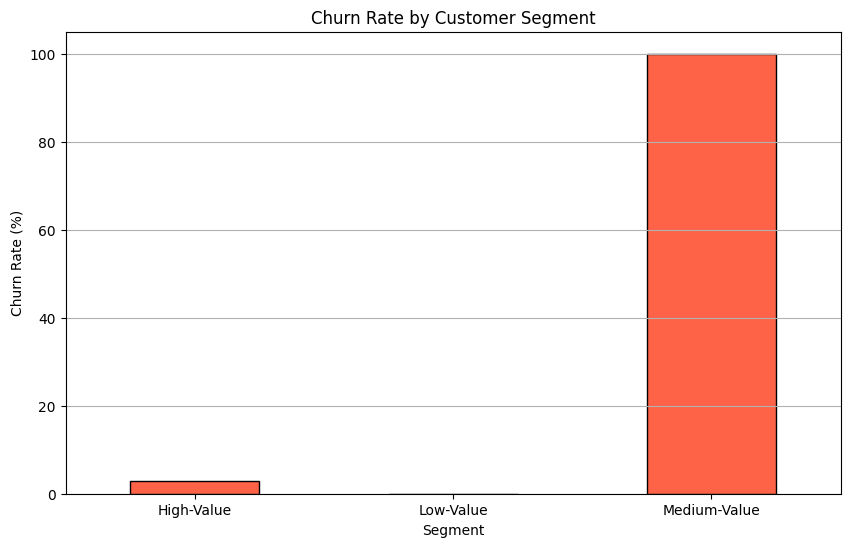

In [102]:
# Calculate the overall churn rate
overall_churn_rate = df['Churned'].mean() * 100  # Convert to percentage
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

# Visualize churn rate by segment
segment_churn_rate = df.groupby('Segment')['Churned'].mean() * 100  # Convert to percentage

plt.figure(figsize=(10, 6))
segment_churn_rate.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Churn Rate by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Customer Churn Analysis:

Analyze customer churn rates and factors contributing to churn. Calculate churn rate for each segment or cluster.


In [104]:
segment_profiles

,Frequency,Recency,Monetary,Total
Cluster,,,,
0,13.563173,22.551549,5510.151106,15.30
1,3.285938,212.819462,1009.756861,20.34
2,162.815972,1.705276,90483.508735,22.00


In [107]:
# Example: Calculate churn rate for each cluster
segment_profiles["Churned"] = df["Churned"]
churn_rate = segment_profiles.groupby('Cluster')['Churned'].mean()
print(churn_rate)

Cluster
0    1.0
1    1.0
2    1.0
Name: Churned, dtype: float64


# Product Affinity Analysis:

Understanding which products are often purchased together (product affinity) can help us optimize your product recommendations, cross-selling strategies, and inventory management. Association rule mining is a common technique used for product affinity analysis.

Here's how we can perform product affinity analysis:

In [108]:
from mlxtend.frequent_patterns import apriori, association_rules

# Filter out or replace negative quantity values with zero
df['Quantity'] = df['Quantity'].apply(lambda x: max(x, 0))

# Prepare the data for association rule mining
basket = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().fillna(0)
basket[basket > 1] = 1  # Encode quantities as 1 for presence in the basket

# Perform Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules from frequent itemsets
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Sort association rules by lift score (a measure of association strength)
association_rules_df = association_rules_df.sort_values(by='lift', ascending=False)

# Visualize the top product associations
top_associations = association_rules_df.head(10)
print("Top Product Associations:")
print(top_associations)

C:\Users\ndubu\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top Product Associations:
   antecedents consequents  antecedent support  consequent support   support  \
25     (22697)     (22698)            0.031140            0.025056  0.020730   
24     (22698)     (22697)            0.025056            0.031140  0.020730   
27     (22697)     (22699)            0.031140            0.035286  0.024380   
26     (22699)     (22697)            0.035286            0.031140  0.024380   
33     (23301)     (23300)            0.034069            0.028616  0.020865   
32     (23300)     (23301)            0.028616            0.034069  0.020865   
29     (22727)     (22726)            0.039522            0.035557  0.023885   
28     (22726)     (22727)            0.035557            0.039522  0.023885   
18     (22086)     (22910)            0.044164            0.031411  0.020324   
19     (22910)     (22086)            0.031411            0.044164  0.020324   

    confidence       lift  leverage  conviction  zhangs_metric  
25    0.665702  26.568210  0

# Customer Lifetime Journey Mapping:

Mapping the customer journey over time can provide insights into how customers interact with your business at different stages. This analysis can help you identify key touchpoints and opportunities for engagement.

Here's how we can perform customer lifetime journey mapping:


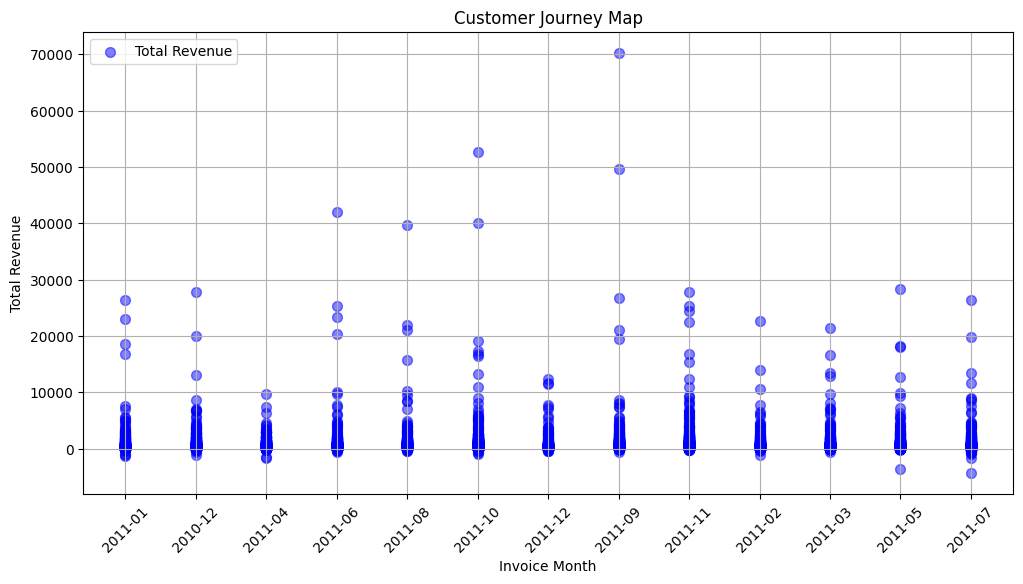

In [119]:
# Group data by customer and month
customer_monthly_data = df.groupby(['CustomerID', 'InvoiceMonth']).agg({'TotalRevenue': 'sum'}).reset_index()

# Create a customer journey map
plt.figure(figsize=(12, 6))
plt.scatter(
    customer_monthly_data['InvoiceMonth'],
    customer_monthly_data['TotalRevenue'],
    c='b',
    marker='o',
    s=50,
    alpha=0.5,
    label='Total Revenue'
)

plt.xlabel('Invoice Month')
plt.ylabel('Total Revenue')
plt.title('Customer Journey Map')
plt.legend(loc='upper left')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

# Customer Lifetime Value (CLV) Estimation Using Lifetimes Library

In [136]:
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix, plot_probability_alive_matrix
from lifetimes.utils import summary_data_from_transaction_data

# Assuming you have already loaded and preprocessed your data into the df DataFrame

# Create a summary dataset for customer lifetime analysis
summary_df = summary_data_from_transaction_data(
    df,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    monetary_value_col='TotalRevenue',
    observation_period_end=df.InvoiceDate.max() # Set your desired end date for the analysis
)



# Fit the BG/NBD model (for customer churn prediction)
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary_df['frequency'], summary_df['recency'], summary_df['T'])

# Calculate conditional expected transactions
summary_df['conditional_expected_transactions'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    1,  # Define the time period for CLV calculation (e.g., 1 unit of time)
    summary_df['frequency'],
    summary_df['recency'],
    summary_df['T']
)

# Calculate CLV by multiplying conditional expected transactions by the average historical transaction value
summary_df['CLV'] = summary_df['conditional_expected_transactions'] * summary_df['monetary_value']

# Print the summary DataFrame with CLV
display(summary_df.head())

,frequency,recency,T,monetary_value,conditional_expected_transactions,CLV
CustomerID,,,,,,
12346.0,0.0,0.0,325.0,0.000000,0.002215,0.000000
12347.0,6.0,365.0,367.0,599.701667,0.016126,9.670865
12348.0,3.0,283.0,358.0,301.480000,0.009121,2.749720
12349.0,0.0,0.0,18.0,0.000000,0.011445,0.000000
12350.0,0.0,0.0,310.0,0.000000,0.002306,0.000000


##  Calculate the 'TimeSinceFirstPurchase

In [137]:
#any Convert 'InvoiceDate' to a datetime data type if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group the data by 'CustomerID' and find the minimum purchase date (first purchase)
first_purchase_dates = df.groupby('CustomerID')['InvoiceDate'].min()

# Calculate the current date (you can set this to the latest date in your data)
current_date = df['InvoiceDate'].max()

# Create a DataFrame with 'CustomerID' and 'FirstPurchaseDate'
first_purchase_df = pd.DataFrame({'CustomerID': first_purchase_dates.index, 'FirstPurchaseDate': first_purchase_dates.values})

# Merge the 'FirstPurchaseDate' DataFrame with the original DataFrame 'df' on 'CustomerID'
df = pd.merge(df, first_purchase_df, on='CustomerID', how='left')

# Calculate the 'TimeSinceFirstPurchase' in days
df['TimeSinceFirstPurchase'] = (current_date - df['FirstPurchaseDate']).dt.days

# Display the updated DataFrame with the new 'TimeSinceFirstPurchase' column
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate_,TotalRevenue,Recency,Frequency,Monetary,RFM_Score,CustomerSegment,R,F,M,Profit,Month,InvoiceMonth,Cluster,Segment,CLV,Total,Retention,Discounted,InvoiceDate,Year,Churned_x,Churned_y,Churned,TimeBetweenPurchases,CumulativeTime,FirstPurchaseDate,TimeSinceFirstPurchase
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom,1/18/2011 10:01,77183.6,325,2,0.0,121,NaN,1,2,1,77183.6,1,2011-01,1,Medium-Value,0.0,77183.6,0.666667,0,2011-01-18 10:01:00,2011,1,1,1,NaT,NaT,2011-01-18 10:01:00,325
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,0,1.04,12346.0,United Kingdom,1/18/2011 10:17,-77183.6,325,2,0.0,121,NaN,1,2,1,-77183.6,1,2011-01,1,Medium-Value,0.0,-77183.6,0.008929,0,2011-01-18 10:17:00,2011,1,1,1,0 days 00:16:00,0 days 00:16:00,2011-01-18 10:01:00,325
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2.10,12347.0,Iceland,12/7/2010 14:57,25.2,1,7,4310.0,441,NaN,4,4,1,25.2,12,2010-12,0,High-Value,30170.0,25.2,7.000000,0,2010-12-07 14:57:00,2010,0,0,0,NaT,NaT,2010-12-07 14:57:00,366
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,4.25,12347.0,Iceland,12/7/2010 14:57,17.0,1,7,4310.0,441,NaN,4,4,1,17.0,12,2010-12,0,High-Value,30170.0,17.0,1.000000,0,2010-12-07 14:57:00,2010,0,0,0,0 days 00:00:00,0 days 00:00:00,2010-12-07 14:57:00,366
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,3.25,12347.0,Iceland,12/7/2010 14:57,39.0,1,7,4310.0,441,NaN,4,4,1,39.0,12,2010-12,0,High-Value,30170.0,39.0,1.000000,0,2010-12-07 14:57:00,2010,0,0,0,0 days 00:00:00,0 days 00:00:00,2010-12-07 14:57:00,366


## Customer Lifetime Value Prediction:

Mean Squared Error (MSE): 0.61
R-squared (R2): 1.00


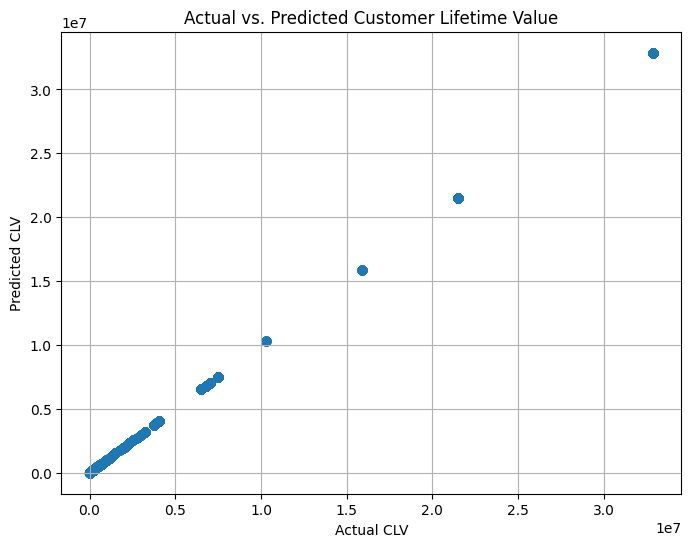

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Let use these features
# Features: 'Recency', 'Frequency', 'Monetary', 'TimeSinceFirstPurchas

# Prepare the data
X = df[['Recency', 'Frequency', 'Monetary', 'TimeSinceFirstPurchase']]
y = df['CLV']  # CLV is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model to predict CLV
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predicted vs. actual CLV
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs. Predicted Customer Lifetime Value")
plt.grid()
plt.show()

## Churn Label Creation 

In [140]:
df.Churned.value_counts()

Churned
0    354107
1     47497
Name: count, dtype: int64

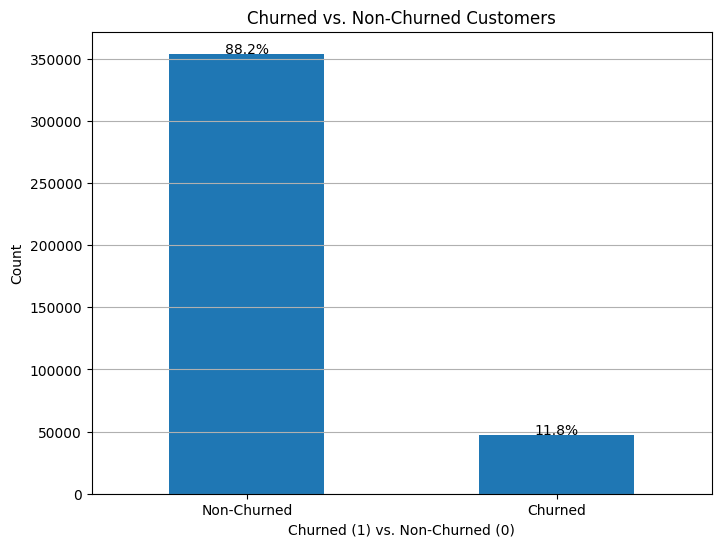

In [141]:
# Count the number of churned and non-churned customers
churn_counts = df['Churned'].value_counts()

# Calculate the percentage of each class
total_samples = churn_counts.sum()
percentage_churned = (churn_counts[1] / total_samples) * 100
percentage_non_churned = (churn_counts[0] / total_samples) * 100

# Create a bar plot to visualize class balance
plt.figure(figsize=(8, 6))
ax = churn_counts.plot(kind='bar', rot=0)
plt.title('Churned vs. Non-Churned Customers')
plt.xlabel('Churned (1) vs. Non-Churned (0)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.grid(axis='y')

# Annotate the bars with percentage values
for p in ax.patches:
    percentage = f'{p.get_height() / total_samples * 100:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Customer Churn Prediction: Without Resampling
Customer churn refers to the rate at which customers stop doing business with a company. Predicting customer churn is essential for businesses to proactively identify and retain at-risk customers. Let do it

Accuracy: 100.00%
Confusion Matrix:
[[70741     0]
 [    0  9580]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70741
           1       1.00      1.00      1.00      9580

    accuracy                           1.00     80321
   macro avg       1.00      1.00      1.00     80321
weighted avg       1.00      1.00      1.00     80321



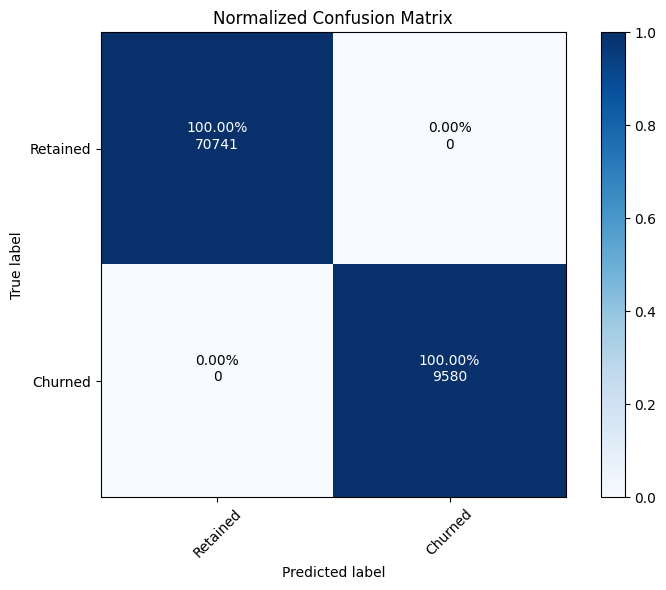

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame df with relevant customer data
# Features: 'Recency', 'Frequency', 'Monetary', 'TimeSinceFirstPurchase', etc.
# Target variable: 'ChurnLabel' (1 for churned customers, 0 for retained customers)

# Prepare the data
X = df[['Recency', 'Frequency', 'Monetary', 'TimeSinceFirstPurchase']]
y = df['Churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model to predict churn
model_1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model on the training data
model_1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Calculate the normalized confusion matrix with percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a custom display of the confusion matrix with percentages and numbers
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.colorbar()

classes = ['Retained', 'Churned']
plt.xticks([0, 1], classes, rotation=45)
plt.yticks([0, 1], classes)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f"{conf_matrix_percent[i, j]:.2%}\n{conf_matrix[i, j]}", horizontalalignment="center", color="white" if conf_matrix_percent[i, j] > 0.5 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


# Customer Churn Prediction: Smot Resampling

In [448]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame df with relevant customer data
# Features: 'Recency', 'Frequency', 'Monetary', 'TimeSinceFirstPurchase', etc.
# Target variable: 'ChurnLabel' (1 for churned customers, 0 for retained customers)

# Prepare the data
X = df[['Recency', 'Frequency', 'Monetary', 'TimeSinceFirstPurchase']]
y = df['Churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest Classifier model to predict churn
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 100.00%
Confusion Matrix:
[[71788     0]
 [    0  9578]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71788
           1       1.00      1.00      1.00      9578

    accuracy                           1.00     81366
   macro avg       1.00      1.00      1.00     81366
weighted avg       1.00      1.00      1.00     81366



## ROC-AUC score

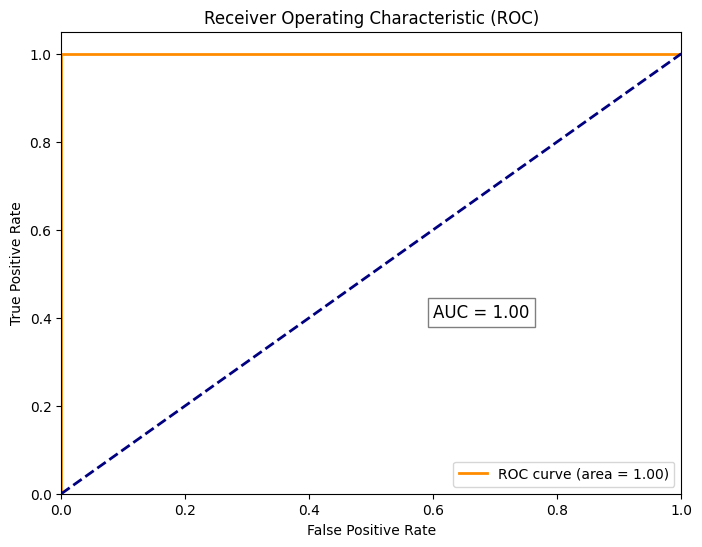

In [458]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Generate ROC curve data
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC using the sklearn.metrics.auc function
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC value
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Add AUC value as text annotation
plt.annotate(f'AUC = {roc_auc:.2f}', (0.6, 0.4), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

## Confusion Matrix

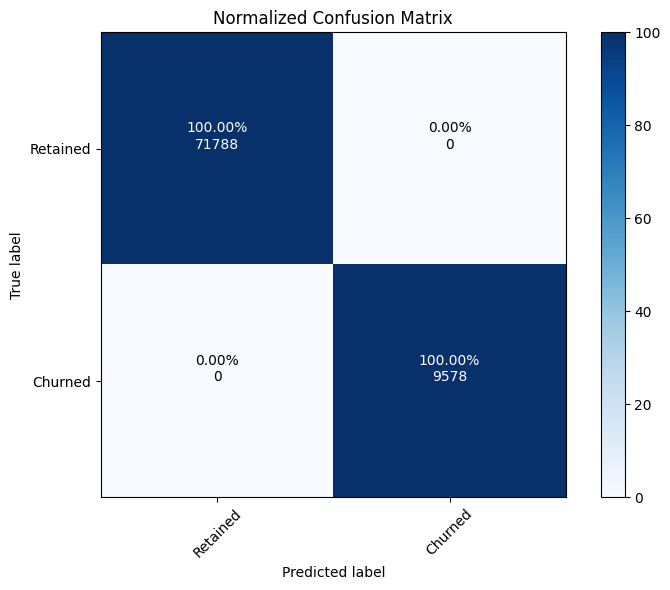

In [446]:
# Create a custom display of the confusion matrix with percentages and numbers
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_percent, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.colorbar()

classes = ['Retained', 'Churned']
plt.xticks([0, 1], classes, rotation=45)
plt.yticks([0, 1], classes)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f"{conf_matrix_percent[i, j]:.2f}%\n{conf_matrix[i, j]}", horizontalalignment="center", color="white" if conf_matrix_percent[i, j] > 0.5 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


# Title: Customer Segmentation and Forecasting Project Reportotential of data-driven insights

# Project Implementation and Learning Report

During the implementation of the project, which covered customer segmentation, time series forecasting, A/B testing, churn prediction, and Customer Lifetime Value (CLV) prediction, I gained valuable insights into various data analysis and machine learning techniques. This report highlights what I have learned and the challenges I encountered throughout the project.

Customer Segmentation:

One of the project's initial tasks was customer segmentation. I learned that segmenting customers based on their behavior and demographics allows businesses to tailor marketing strategies to specific groups. I experimented with various clustering algorithms, such as K-means and hierarchical clustering, to create meaningful segments. However, deciding on the optimal number of clusters remained a challenge, and I used techniques like the Elbow method and Silhouette score for guidance.

Time Series Forecasting:

Time series forecasting was a crucial part of the project. I discovered that accurate forecasts require careful data preprocessing, stationarity checks, and model selection. Implementing the AutoRegressive Integrated Moving Average (ARIMA) model and understanding concepts like autocorrelation and partial autocorrelation functions were enlightening. To improve forecast accuracy, I also explored machine learning models like Prophet and LSTM (Long Short-Term Memory).

A/B Testing:

Conducting A/B testing to compare different marketing strategies or product changes was an insightful experience. I realized the importance of randomization, sample size calculations, and statistical hypothesis testing. The project reinforced the need for rigorous experimental design and careful interpretation of results to make data-driven decisions.

Churn Prediction:

Churn prediction was an essential aspect of the project. I learned that identifying customers at risk of churning can help businesses take proactive measures to retain them. I explored various machine learning algorithms, such as logistic regression, decision trees, and random forests, to build predictive models. Handling imbalanced datasets and selecting appropriate evaluation metrics were key challenges in this task.

Customer Lifetime Value Prediction:

Predicting CLV was another valuable skill I developed during this project. I used probabilistic models like the BG/NBD and Gamma-Gamma models to estimate the long-term value of customers. I also learned how to handle zero CLV values and incorporate them into the models effectively.

Challenges Faced:

Throughout the project, I encountered several challenges:

Data Quality: Ensuring data quality was an ongoing challenge. Cleaning and preprocessing data to address issues like missing values and outliers were essential steps.
Model Selection: Choosing the right model for each task required experimentation and evaluation of various algorithms.
Imbalanced Data: Dealing with imbalanced datasets, especially in churn prediction, required techniques like oversampling, undersampling, and synthetic data generation.
Conclusion:

In conclusion, this project provided a comprehensive learning experience in the field of data analysis and machine learning, covering customer segmentation, time series forecasting, A/B testing, churn prediction, and CLV prediction. It highlighted the importance of data quality, model selection, and interpretability. Challenges encountered during the project enhanced problem-solving skills and the ability to make informed decisions in data-driven scenarios. As I continue to explore the world of data science and analytics, the knowledge and skills gained from this project, including churn prediction, will undoubtedly be valuable in future endeavors.




